In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.lines import Line2D

# A: 01/2025
# B: 08/2024 --> 22/05/2025
# C: 04/2021
# D: population 2024

####################
####################
# FRANCE 1921-2025 #
#####   INSEE  #####
####################
####################

file_path_data = 'data/data_immig_demo_combined_05_06_2025.csv'

df = pd.read_csv(file_path_data)
print(df.columns)

language = 'fr'
source = 'Insee, recensement'
champ = 'France'
print('B - Results')

if language == 'fr':
        label_for = "Etrangers"
        label_immig = "Immigrés"
        label_non_immig = "Non-immigrés"
        label_for_immig = "Immigré étrangers"
        label_born_fr_ab = "Né français à l\'étranger"
        label_demo = "Démographie"
        label_lec = "Lecture"
        label_champ = "Champ"
        label_annee = "Année"
elif language == 'en':
        label_for = "Foreigners"
        label_immig = "Immigrants"
        label_non_immig = "Non-immigrants"
        label_for_immig = "Foreign immigrants"
        label_born_fr_ab = "Born french abroad"
        label_demo = "Demography"
        label_lec = "Reading"
        label_champ = "Scope"
        label_annee = "Year"

def set_ax(ax, source_fr, source_en, note_fr, note_en, language, lecture_fr, lecture_en, title_fr, title_en, label_x, label_y, label_leg, width, fontsize):
    ax.grid(axis='y', linestyle='--', alpha=0.5)
    ax.grid(axis='x', linestyle='--', alpha=0.5)
    if language == 'fr':
        lecture = lecture_fr 
        title = title_fr 
        source = source_fr
        note = note_fr
    elif language == 'en':
        lecture = lecture_en
        title = title_en
        source = source_en
        note = note_en
    ax.set_ylabel(label_y, fontsize=fontsize )
    ax.set_xlabel(label_x, fontsize=fontsize )
    ax.legend(label_leg, fontsize=fontsize-1, frameon=False)
    ax.set_title(title, fontsize=fontsize)
    if note == "":      
        ax.text(0, -0.24, label_lec+f': '+lecture+f".", transform=ax.transAxes, ha='left', va='bottom', fontsize=fontsize-2)
        ax.text(0, -0.31, label_champ+f': '+champ+f".", transform=ax.transAxes, ha='left', va='bottom', fontsize=fontsize-2)
        ax.text(0, -0.39, f'Source: '+source+".", transform=ax.transAxes, ha='left', va='bottom', fontsize=fontsize-2)
    else:      
        ax.text(0, -0.25, f'Note: '+note+f".", transform=ax.transAxes, ha='left', va='bottom', fontsize=fontsize-2)
        ax.text(0, -0.37, label_lec+f': '+lecture+f".", transform=ax.transAxes, ha='left', va='bottom', fontsize=fontsize-2)
        ax.text(0, -0.44, label_champ+f': '+champ+f".", transform=ax.transAxes, ha='left', va='bottom', fontsize=fontsize-2)
        ax.text(0, -0.51, f'Source: '+source+".", transform=ax.transAxes, ha='left', va='bottom', fontsize=fontsize-2)

Index(['Année', 'Entrées Immigrés (B)', 'Sorties Immigrés (B)',
       'Solde migratoire Immigrés (B)', 'Entrées Non-immigrés (B)',
       'Sorties Non-immigrés (B)', 'Solde migratoire Non-immigrés (B)',
       'Entrées (B)', 'Sorties (B)', 'Solde migratoire (B)',
       'Solde naturel (A)', 'Solde migratoire (A)', 'Étrangers (%)',
       'Immigrés (%)', 'Étrangers (%) (A)', 'Immigrés (%) (A)',
       'Solde Non-immigrés (C)', 'Solde Immigrés (C)', 'Solde (C)',
       'Naissances', 'Décès', 'Naissances (A)', 'Décès (A)', 'Femmes',
       'Hommes', 'Femmes (A)', 'Hommes (A)', 'Étrangers (A)', 'Immigrés (A)',
       'Population (A)', 'Décès Immigrés (BC)', 'Décès Non-immigrés (ABC)',
       'Décès Immigrés (Ae)', 'Décès Non-immigrés (Ae)',
       'Solde Immigrés (ABe)', 'Solde Non-immigrés (ABe)', 'Solde (ABe)',
       'Solde (A)', 'Sorties (AB)', 'Sorties Immigrés (ABe)',
       'Sorties Non-immigrés (ABe)', 'Solde migratoire Immigrés (ABe)',
       'Solde migratoire Non-immigrés (ABe)'

/var/folders/k6/qg3z0g1s14b6gmg24xwcgvgw0000gn/T/ipykernel_9311/3691911535.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_['X'] = df_['Immigrés (A)'] / df_['Population (A)'] * 100


    Année          X
0    1921   3.683437
1    1926   5.688078
2    1931   6.620016
3    1936   5.648204
4    1946   4.983688
5    1954   5.359856
6    1962   6.158764
7    1968   6.520995
8    1975   7.389874
9    1982   7.435170
17   1990   7.269534
26   1999   7.272546
33   2006   8.128845
34   2007   8.257142
35   2008   8.352316
36   2009   8.448553
37   2010   8.534209
38   2011   8.632229
39   2012   8.758269
40   2013   8.900050
41   2014   9.114499
42   2015   9.287666
43   2016   9.446178
44   2017   9.657579
45   2018   9.820397
46   2019  10.011448
47   2020  10.152591
48   2021  10.240320
49   2022  10.327913
50   2023  10.685995


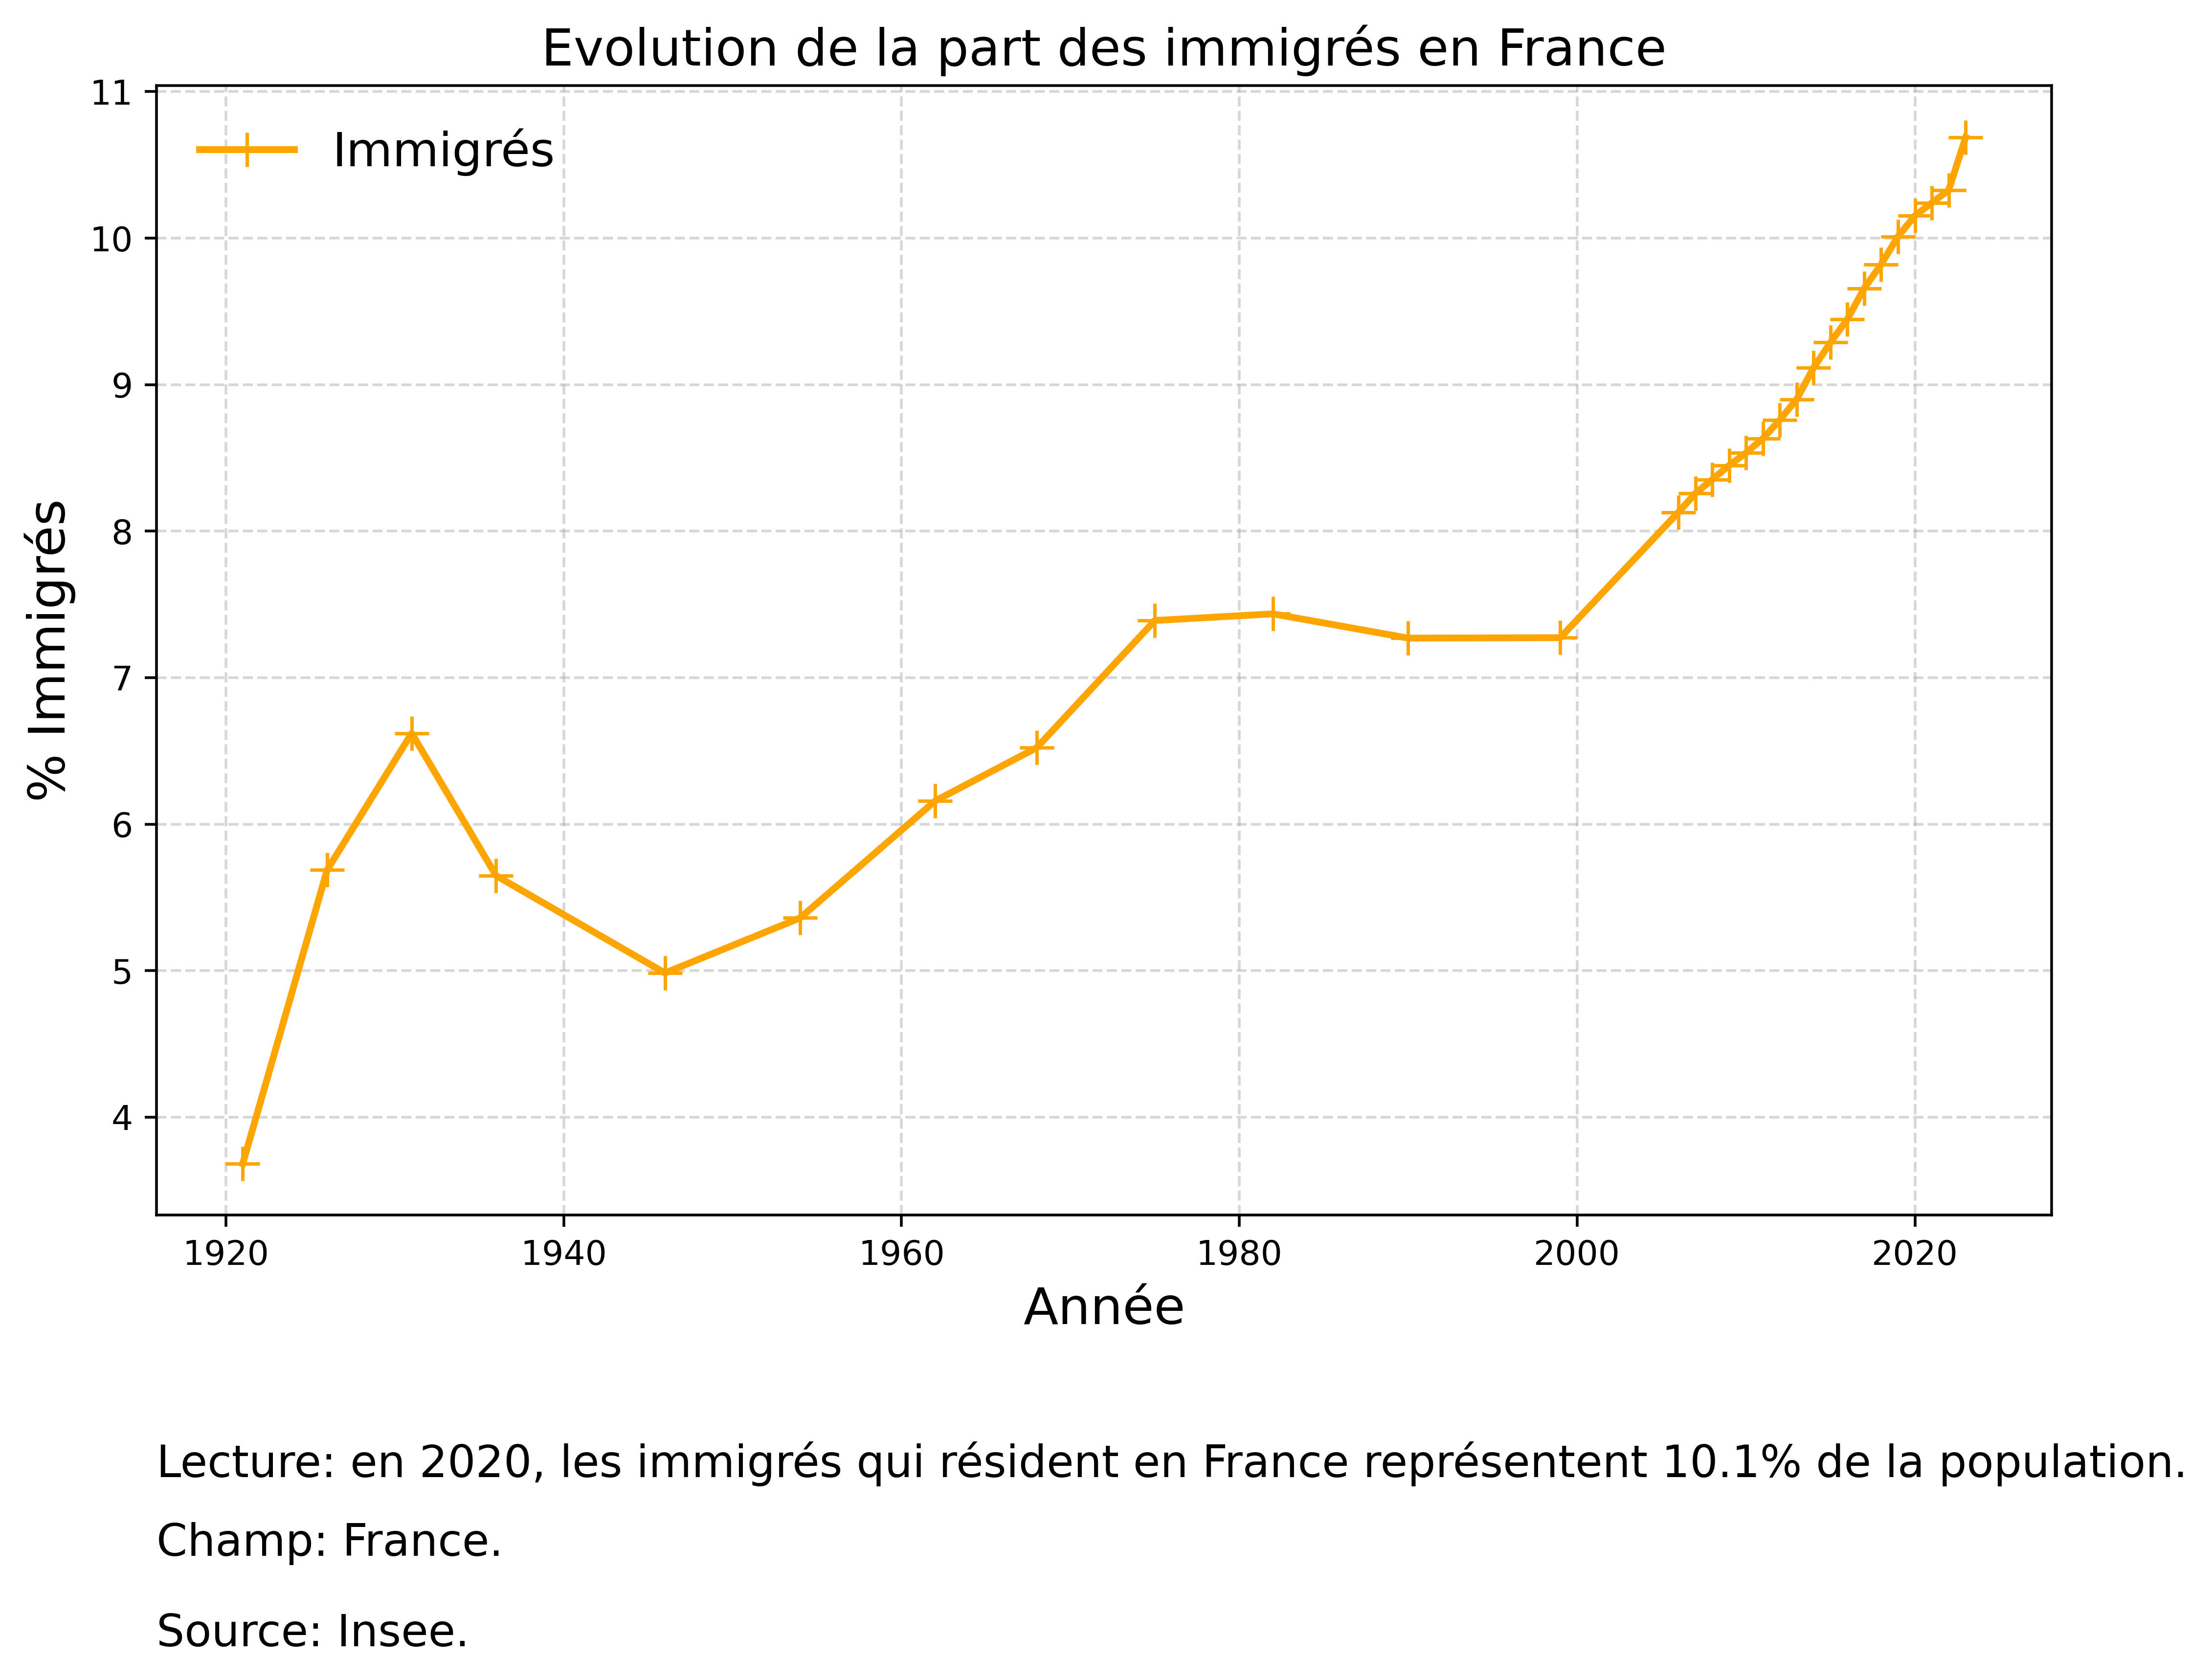

In [11]:
#### plot evolution % immigrés en france ###

fig, ax = plt.subplots(figsize=(10, 6), dpi=500)

width = 2
fontsize = 15

# read the graph
lecture_fr = f"en 2020, les immigrés qui résident en France représentent 10.1% de la population"
lecture_en = f"in 2020, immigrants residing in France represent 10.1% of the population"
title_fr = "Evolution de la part des immigrés en France"
title_en = "Evolution of the share of immigrants in France"
source_fr = "Insee"
source_en = "Insee"
note_fr = ""
note_en = ""

label_x = label_annee
label_y = f'% '+label_immig
label_leg = [label_immig]
 
#df_ = df[(df['Année']>= 1970) & (df['Année']<= 2023)]
df_ = df.dropna(subset=['Immigrés (A)'], how='any')
values = df_['Immigrés (A)'] / df_['Population (A)'] * 100

df_['X'] = df_['Immigrés (A)'] / df_['Population (A)'] * 100
df2 = df_[['Année', 'X']]
print(df2)

ax.plot(df_['Année'], values, linewidth=width, label=label_immig, marker='+', markersize=10, color='orange')

ax.fill_between(
    df_['Année'],
    values - 0.04/100 * values,
    values + 0.04/100 * values,
    color='orange',
    alpha=0.3,
    label='±0.04%'
)

set_ax(ax, source_fr, source_en, note_fr, note_en, language, lecture_fr, lecture_en, title_fr, title_en, label_x, label_y, label_leg, width, fontsize)
#ax.set_ylim(7, 12)
#ax.set_xticks(df_['Année'])
#ax.set_xticklabels(df_['Année'].astype(str), rotation=45, ha='right')

#plt.savefig(f"plots/immig_france_"+language+f".png", dpi=500, bbox_inches='tight')

In [ ]:
#### plot evolution % immigrés en france ###

fig, ax = plt.subplots(figsize=(10, 6), dpi=500)

width = 2
fontsize = 15

# read the graph
lecture_fr = f"en 2006, les immigrés qui résident en France représentent 8.13% de la population"
lecture_en = f"in 2006, immigrants residing in France represent 8.13% of the population"
title_fr = "Evolution de la part des immigrés en France"
title_en = "Evolution of the share of immigrants in France"
source_fr = "Insee, recencement"
source_en = "Insee, recencement"
note_fr = ""
note_en = ""

label_x = label_annee
label_y = f'% '+label_immig
label_leg = [label_immig]

df['Immigrés (test)'] =  df['Immigrés (A)']
df['Population (test)'] =  df['Population (A)']

# Boucle à partir de 2013 jusqu’à la dernière année
for i in range(1, len(df)):
    current_year = df.iloc[i]['Année']
    if current_year > 2013:
        prev_idx = i - 1
        # Récupération des valeurs de l’année précédente (déjà recalculées)
        immig_prev = df.iloc[prev_idx]['Immigrés (test)']
        pop_prev = df.iloc[prev_idx]['Population (test)']
        solde = df.iloc[prev_idx]['Solde (A)']
        
        # Calculs selon la formule
        df.at[df.index[i], 'Immigrés (test)'] = immig_prev + solde * immig_prev / pop_prev
        df.at[df.index[i], 'Population (test)'] = pop_prev + solde

print((df['Immigrés (test)']-df['Immigrés (A)'])/df['Immigrés (A)']*100)
print(df['Immigrés (test)']/df['Population (A)']*100)
print((df['Population (test)']-df['Population (A)'])/df['Population (A)']*100)


df = df[(df['Année']>= 2006) & (df['Année']<= 2023)]
df_ = df.dropna(subset=['Immigrés (test)'], how='any')
values = df_['Immigrés (test)'] / df_['Population (test)'] * 100

ax.plot(df_['Année'], values, linewidth=width, label=label_immig, linestyle='--', color='orange')

ax.fill_between(
    df_['Année'],
    values - 0.04/100 * values,
    values + 0.04/100 * values,
    color='orange',
    alpha=0.3,
    label='±0.04%'
)

set_ax(ax, source_fr, source_en, note_fr, note_en, language, lecture_fr, lecture_en, title_fr, title_en, label_x, label_y, label_leg, width, fontsize)
ax.set_ylim(7, 12)
ax.set_xticks(df['Année'])
ax.set_xticklabels(df['Année'].astype(str), rotation=45, ha='right')

#plt.savefig(f"plots/immig_france_test_const"+language+f".png", dpi=500, bbox_inches='tight')

50    7281.8
Name: Immigrés (A), dtype: float64
50    68143.4
Name: Population (A), dtype: float64
0    1429.1
Name: Immigrés (A), dtype: float64
0    38798.0
Name: Population (A), dtype: float64


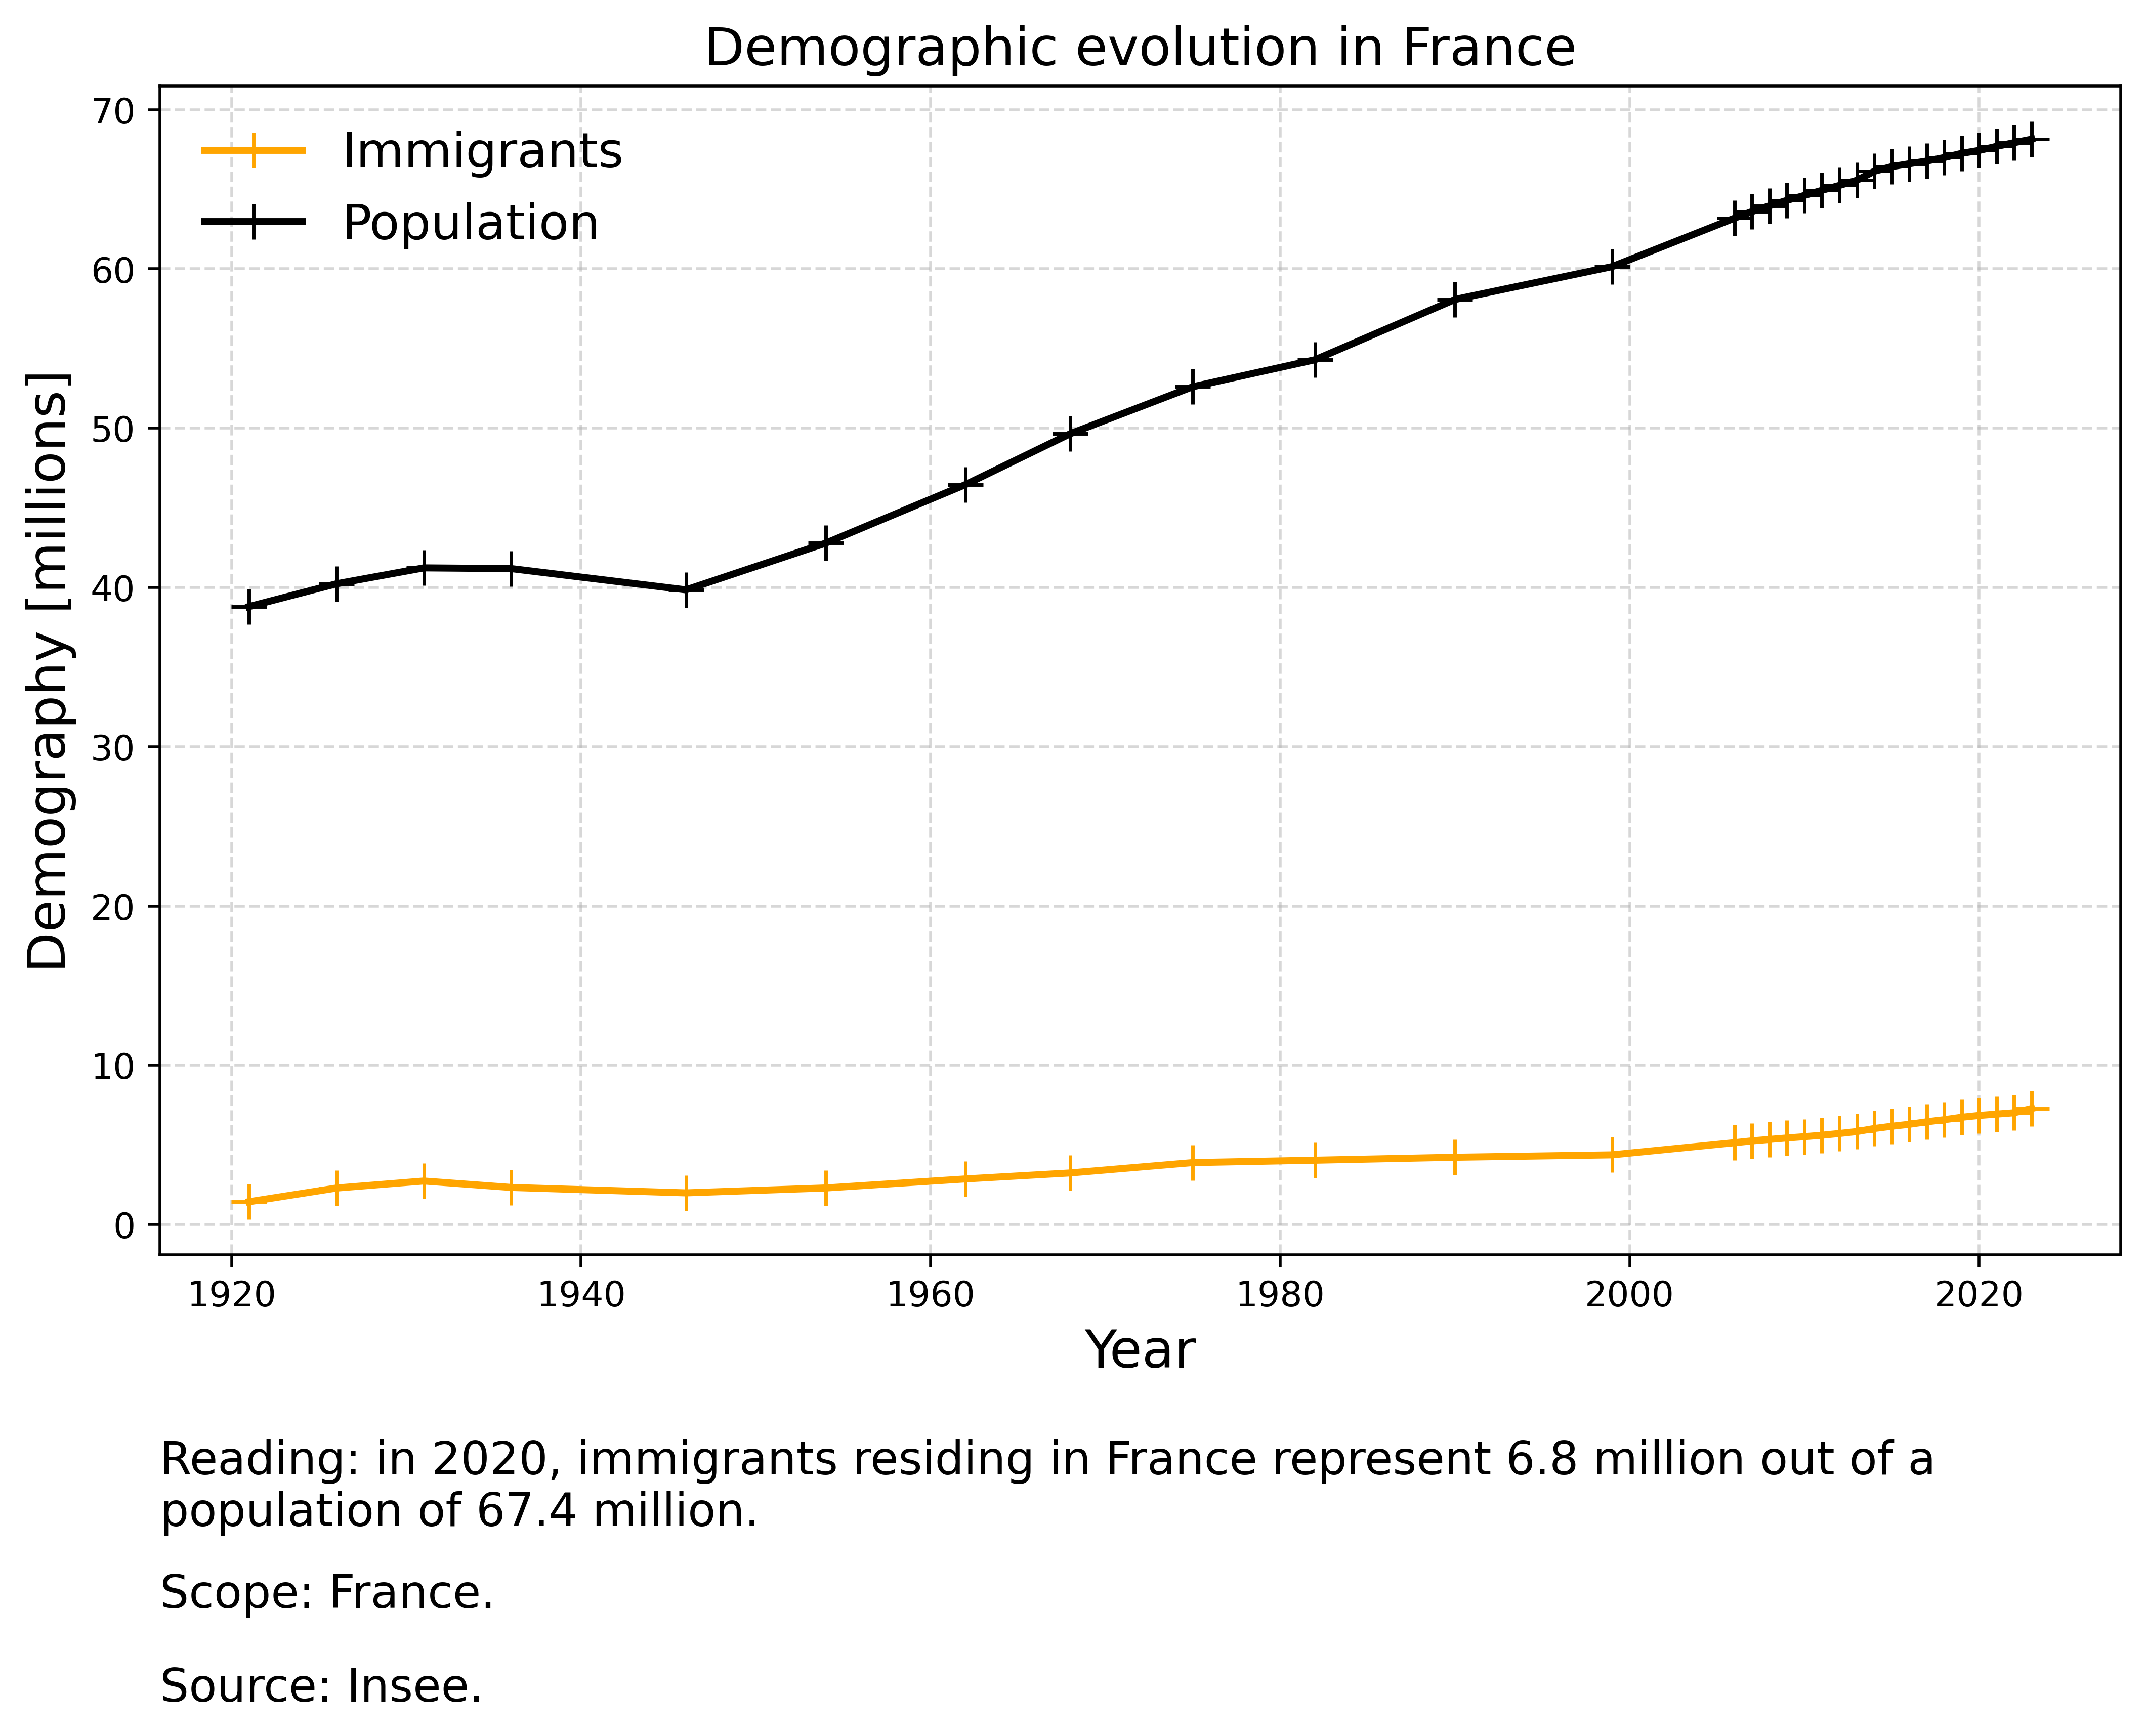

In [4]:
#### plot evolution % immigrés en france ###

fig, ax = plt.subplots(figsize=(10, 6), dpi=500)

width = 2
fontsize = 15

# read the graph
lecture_fr = f"en 2020, les immigrés qui résident en France représentent 6.8 millions\nsur une population de 67.4 millions"
lecture_en = f"in 2020, immigrants residing in France represent 6.8 million out of a\npopulation of 67.4 million"
title_fr = "Evolution de la démographie en France"
title_en = "Demographic evolution in France"
source_fr = "Insee, recencement"
source_en = "Insee, recencement"
note_fr = ""
note_en = ""
label_y_fr = "Demographie [millions]"
label_y_en = "Demography [millions]"
label_y = ""
label_x = label_annee
label_leg=""
if language == 'fr':
    label_y = label_y_fr
elif language == 'en':
    label_y = label_y_en

label_x = label_annee

print(df[df['Année'] == 2023]['Immigrés (A)'])
print(df[df['Année'] == 2023]['Population (A)'])

print(df[df['Année'] == 1921]['Immigrés (A)'])
print(df[df['Année'] == 1921]['Population (A)'])

df_ = df.dropna(subset=['Immigrés (A)'], how='any')

set_ax(ax, source_fr, source_en, note_fr, note_en, language, lecture_fr, lecture_en, title_fr, title_en, label_x, label_y, label_leg, width, fontsize)

ax.plot(df_['Année'], df_['Immigrés (A)']/1000, linewidth=width, label=label_immig, marker='+', markersize=10, color='orange')
ax.plot(df_['Année'], df_['Population (A)']/1000, linewidth=width, label="Population", marker='+', markersize=10, color='black')

ax.legend(fontsize=fontsize-1, frameon=False)

#ax.fill_between(
#    df_['Année'],
#    values - 0.04/100 * values,
#    values + 0.04/100 * values,
#    color='orange',
#    alpha=0.3,
#    label='±0.04%'
#)

#ax.set_ylim(2, 14)
#ax.set_xticks(df['Année'])
#ax.set_xticklabels(df['Année'].astype(str), rotation=45, ha='right')

#plt.savefig(f"plots/immig_france_pop_"+language+f".png", dpi=500, bbox_inches='tight')

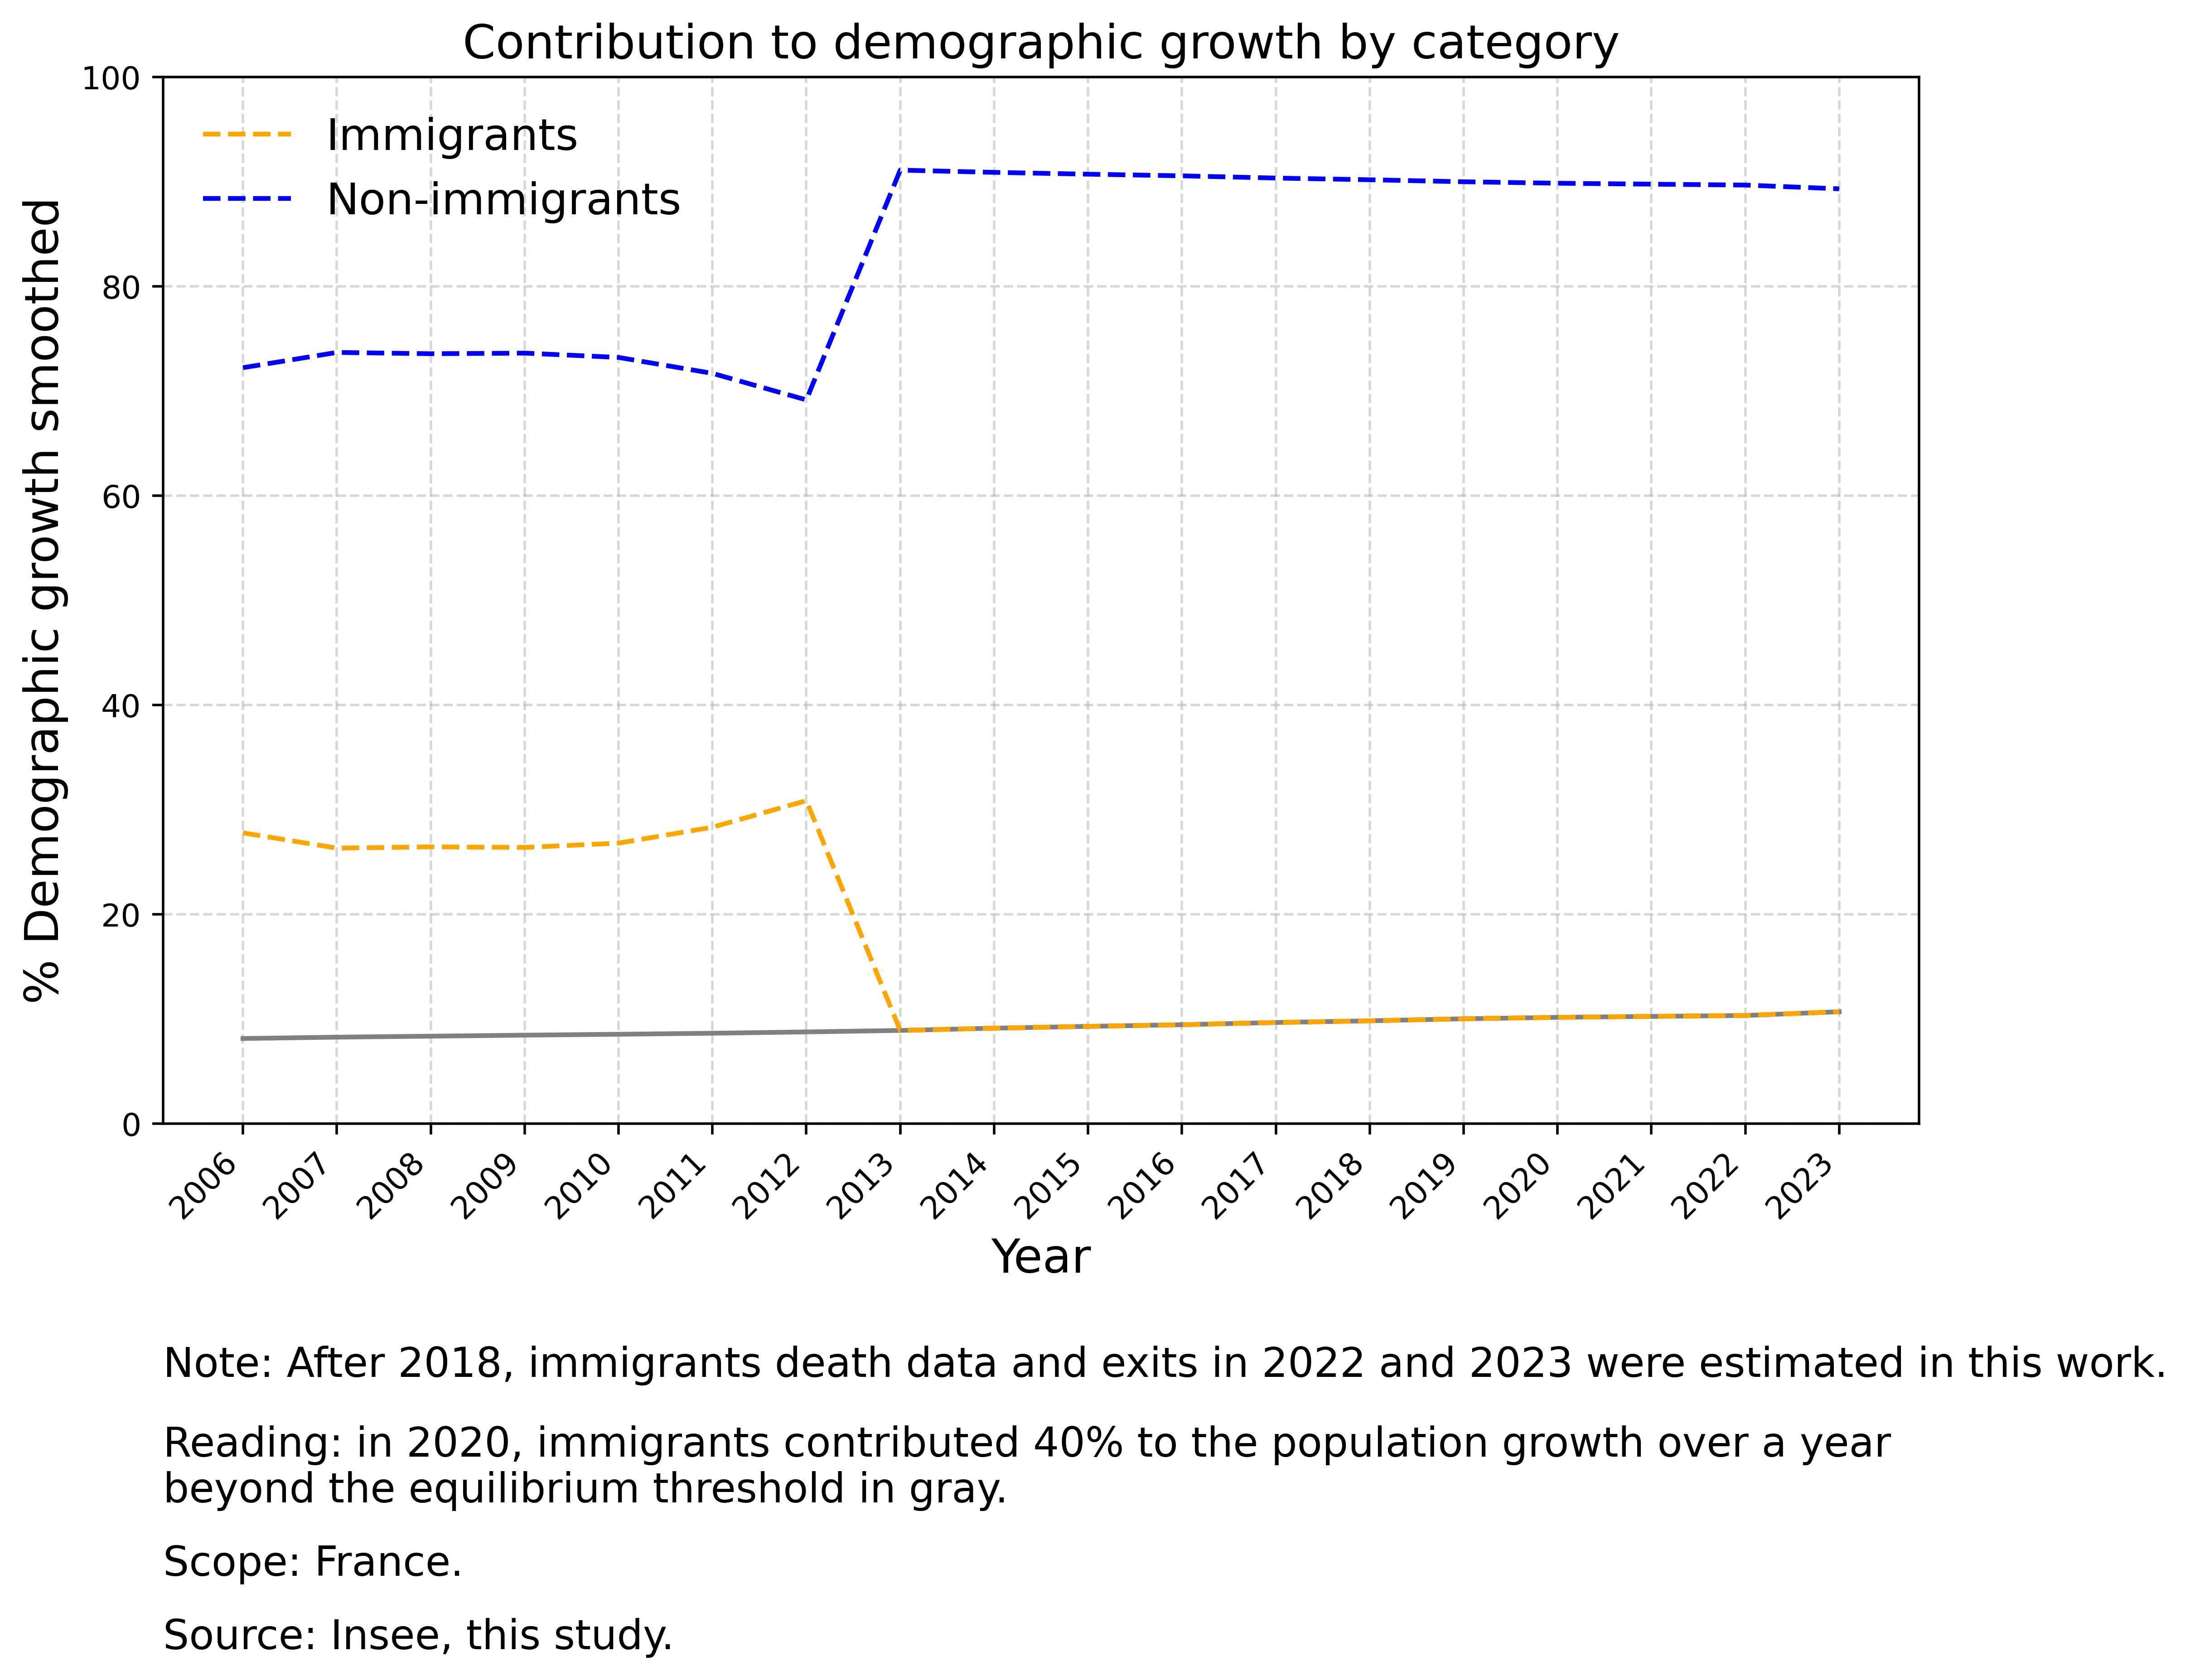

In [22]:
#### plot contribution immigrés à l'acroissement démographique ###

fig, ax = plt.subplots(figsize=(10, 6), dpi=500)

source_fr = "Insee, recencement cette étude"
source_en = "Insee, recencement, this study"

width = 2.5
fontsize = 15

# read the graph
lecture_fr = f"en 2020, les immigrés contribuent à hauteur de 40% à l'accroissement de la\npopulation sur une année, au dela du seuil d'équilibre en gris"
lecture_en = f"in 2020, immigrants contributed 40% to the population growth over a year\nbeyond the equilibrium threshold in gray"
title_fr = "Contribution à l'acroissement démographique par catégorie"
title_en = "Contribution to demographic growth by category"
note_fr = "Après 2018, les données sur les décès d'immigrés et les sorties en 2022 et 2023\nont été estimés dans cette étude"
note_en = "After 2018, immigrants death data and exits in 2022 and 2023 were estimated in this work"
label_fr = "Accroissement démographique lissé"
label_en = "Demographic growth smoothed"

label_x = label_annee
label_leg = [label_immig, "", label_non_immig, ""]
if language == 'fr':
    label_y = f'% '+label_fr
elif language == 'en':
    label_y = f'% '+label_en

#df = df[df['Année']>= 2000]
# Priorité : C > ABe > ABe+
df['Solde Immigrés (X)'] = df['Solde Immigrés (C)'].combine_first(
    df['Solde Immigrés (ABe)']).combine_first(df['Solde Immigrés (ABe+)'])

df['Solde (X)'] = df['Solde (C)'].combine_first(
    df['Solde (ABe)']).combine_first(df['Solde (ABe+)'])

df['Solde % (X)'] = (df['Solde Immigrés (X)']/df['Solde (X)']*100)

df['Solde % smooth (X)'] = df['Solde % (X)'].rolling(window=5, min_periods=1).mean()

mask = df['Année'] >= 2013

# Applique le traitement uniquement à partir de 2013
df.loc[mask, 'Solde % smooth (X)'] = (
    df['Immigrés (A)'] / df['Population (A)']*100
)

set_ax(ax, source_fr, source_en, note_fr, note_en, language, lecture_fr, lecture_en, title_fr, title_en, label_x, label_y, label_leg, width, fontsize)

ax.plot(df[(df['Année'] > 2005)]['Année'], df[(df['Année'] > 2005)]['Immigrés (A)'] / df[(df['Année'] > 2005)]['Population (A)'] * 100, color='grey', linestyle='-')
ax.plot(df['Année'], df['Solde % smooth (X)'], label=label_immig, color='orange', linestyle='--')
ax.plot(df['Année'], (100-df['Solde % smooth (X)']), label=label_non_immig, color='blue', linestyle='--')


ax.legend(fontsize=fontsize-1, frameon=False)
ax.set_ylim(0, 100)

#ax.set_xticks(df['Année'])
#ax.set_xticklabels(df['Année'].astype(str), rotation=45, ha='right')

xticks = df.loc[(df['Année'] > 2005) & (df['Année'] < 2024), 'Année'].tolist()
xtick_labels = [
    f"{year}"
    for year in xticks
]

ax.set_xticks(xticks)
ax.set_xticklabels(xtick_labels, rotation=45, ha='right')

plt.savefig(f"plots/immig_france_demo_growth_share_smooth_const_test_"+language+f".png", dpi=500, bbox_inches='tight')

In [ ]:
#### plot contribution immigrés à l'acroissement démographique ###

fig, ax = plt.subplots(figsize=(10, 6), dpi=500)

source_fr = "Insee, recencement, cette étude"
source_en = "Insee, recencement, this study"

width = 2.5
fontsize = 15

# read the graph
lecture_fr = f"en 2020, les immigrés contribue à hauteur de 40% à l'accroissement de la\npopulation sur une année, au dela du seuil d'équilibre en gris"
lecture_en = f"in 2020, immigrants contributed 40% to the population growth over a year\nbeyond the equilibrium threshold in gray"
title_fr = "Contribution à l'acroissement démographique par catégorie"
title_en = "Contribution to demographic growth by category"
note_fr = "Après 2018, les données sur les décès d'immigrés et les sorties en 2022 et 2023\nont été estimés dans cette étude"
note_en = "After 2018, immigrants death data and exits in 2022 and 2023 were estimated in this work"
label_fr = "Accroissement démographique lissé"
label_en = "Demographic growth smoothed"

label_x = label_annee
label_leg = [label_immig, "", label_non_immig, ""]
if language == 'fr':
    label_y = f'% '+label_fr
elif language == 'en':
    label_y = f'% '+label_en

mask = df['Année'] >= 2013

# Applique le traitement uniquement à partir de 2013
df.loc[mask, 'Immigrés (test)'] = (
    df['Immigrés (test)'].shift(+1)
    + df['Solde (A)'] * df['Immigrés (test)'].shift(+1) / df['Population (test)'].shift(+1)
)

#df = df[df['Année']>= 2000]
# Priorité : C > ABe > ABe+
solde_immigres = df['Solde Immigrés (C)'].combine_first(
    df['Solde Immigrés (ABe)']).combine_first(df['Solde Immigrés (ABe+)'])

solde_tot = df['Solde (C)'].combine_first(
    df['Solde (ABe)']).combine_first(df['Solde (ABe+)'])

y_i = (solde_immigres/solde_tot*100)

y_i_m = y_i.rolling(window=5, min_periods=1).mean()


#solde_tot = df['Solde (A)']

before_2018 = (df['Année'] < 2018) & (df['Année'] > 2005)
after_2017 = (df['Année'] >= 2017) & (df['Année'] < 2024)

set_ax(ax, source_fr, source_en, note_fr, note_en, language, lecture_fr, lecture_en, title_fr, title_en, label_x, label_y, label_leg, width, fontsize)

#ax.plot(df['Année'][before_2018], (solde_immigres/solde_tot*100)[before_2018], marker='+', markersize=10, label=label_immig, color='orange')
#ax.plot(df['Année'][after_2017], (solde_immigres/solde_tot*100)[after_2017], marker='+', markersize=10, color='orange', linestyle='dotted')
#ax.plot(df['Année'][before_2018], (100-solde_immigres/solde_tot*100)[before_2018], marker='+', markersize=10, label=label_non_immig, color='blue')
#ax.plot(df['Année'][after_2017], (100-solde_immigres/solde_tot*100)[after_2017], marker='+', markersize=10, color='blue', linestyle='dotted')

ax.plot(df['Année'][before_2018], y_i_m[before_2018], label=label_immig, color='orange')
ax.plot(df['Année'][after_2017], y_i_m[after_2017], color='orange', linestyle='dotted')
ax.plot(df['Année'][before_2018], (100-y_i_m)[before_2018], label=label_non_immig, color='blue')
ax.plot(df['Année'][after_2017], (100-y_i_m)[after_2017], color='blue', linestyle='dotted')

ax.plot(df[(df['Année'] > 2005)]['Année'], df[(df['Année'] > 2005)]['Immigrés (A)'] / df[(df['Année'] > 2005)]['Population (A)'] * 100, color='grey', linestyle='-')

ax.legend(fontsize=fontsize-1, frameon=False)
ax.set_ylim(0, 100)

#ax.set_xticks(df['Année'])
#ax.set_xticklabels(df['Année'].astype(str), rotation=45, ha='right')

xticks = df.loc[(df['Année'] > 2005) & (df['Année'] < 2024), 'Année'].tolist()
xtick_labels = [
    f"{year}"
    for year in xticks
]

ax.set_xticks(xticks)
ax.set_xticklabels(xtick_labels, rotation=45, ha='right')

#plt.savefig(f"plots/immig_france_demo_growth_share_smooth_"+language+f".png", dpi=500, bbox_inches='tight')

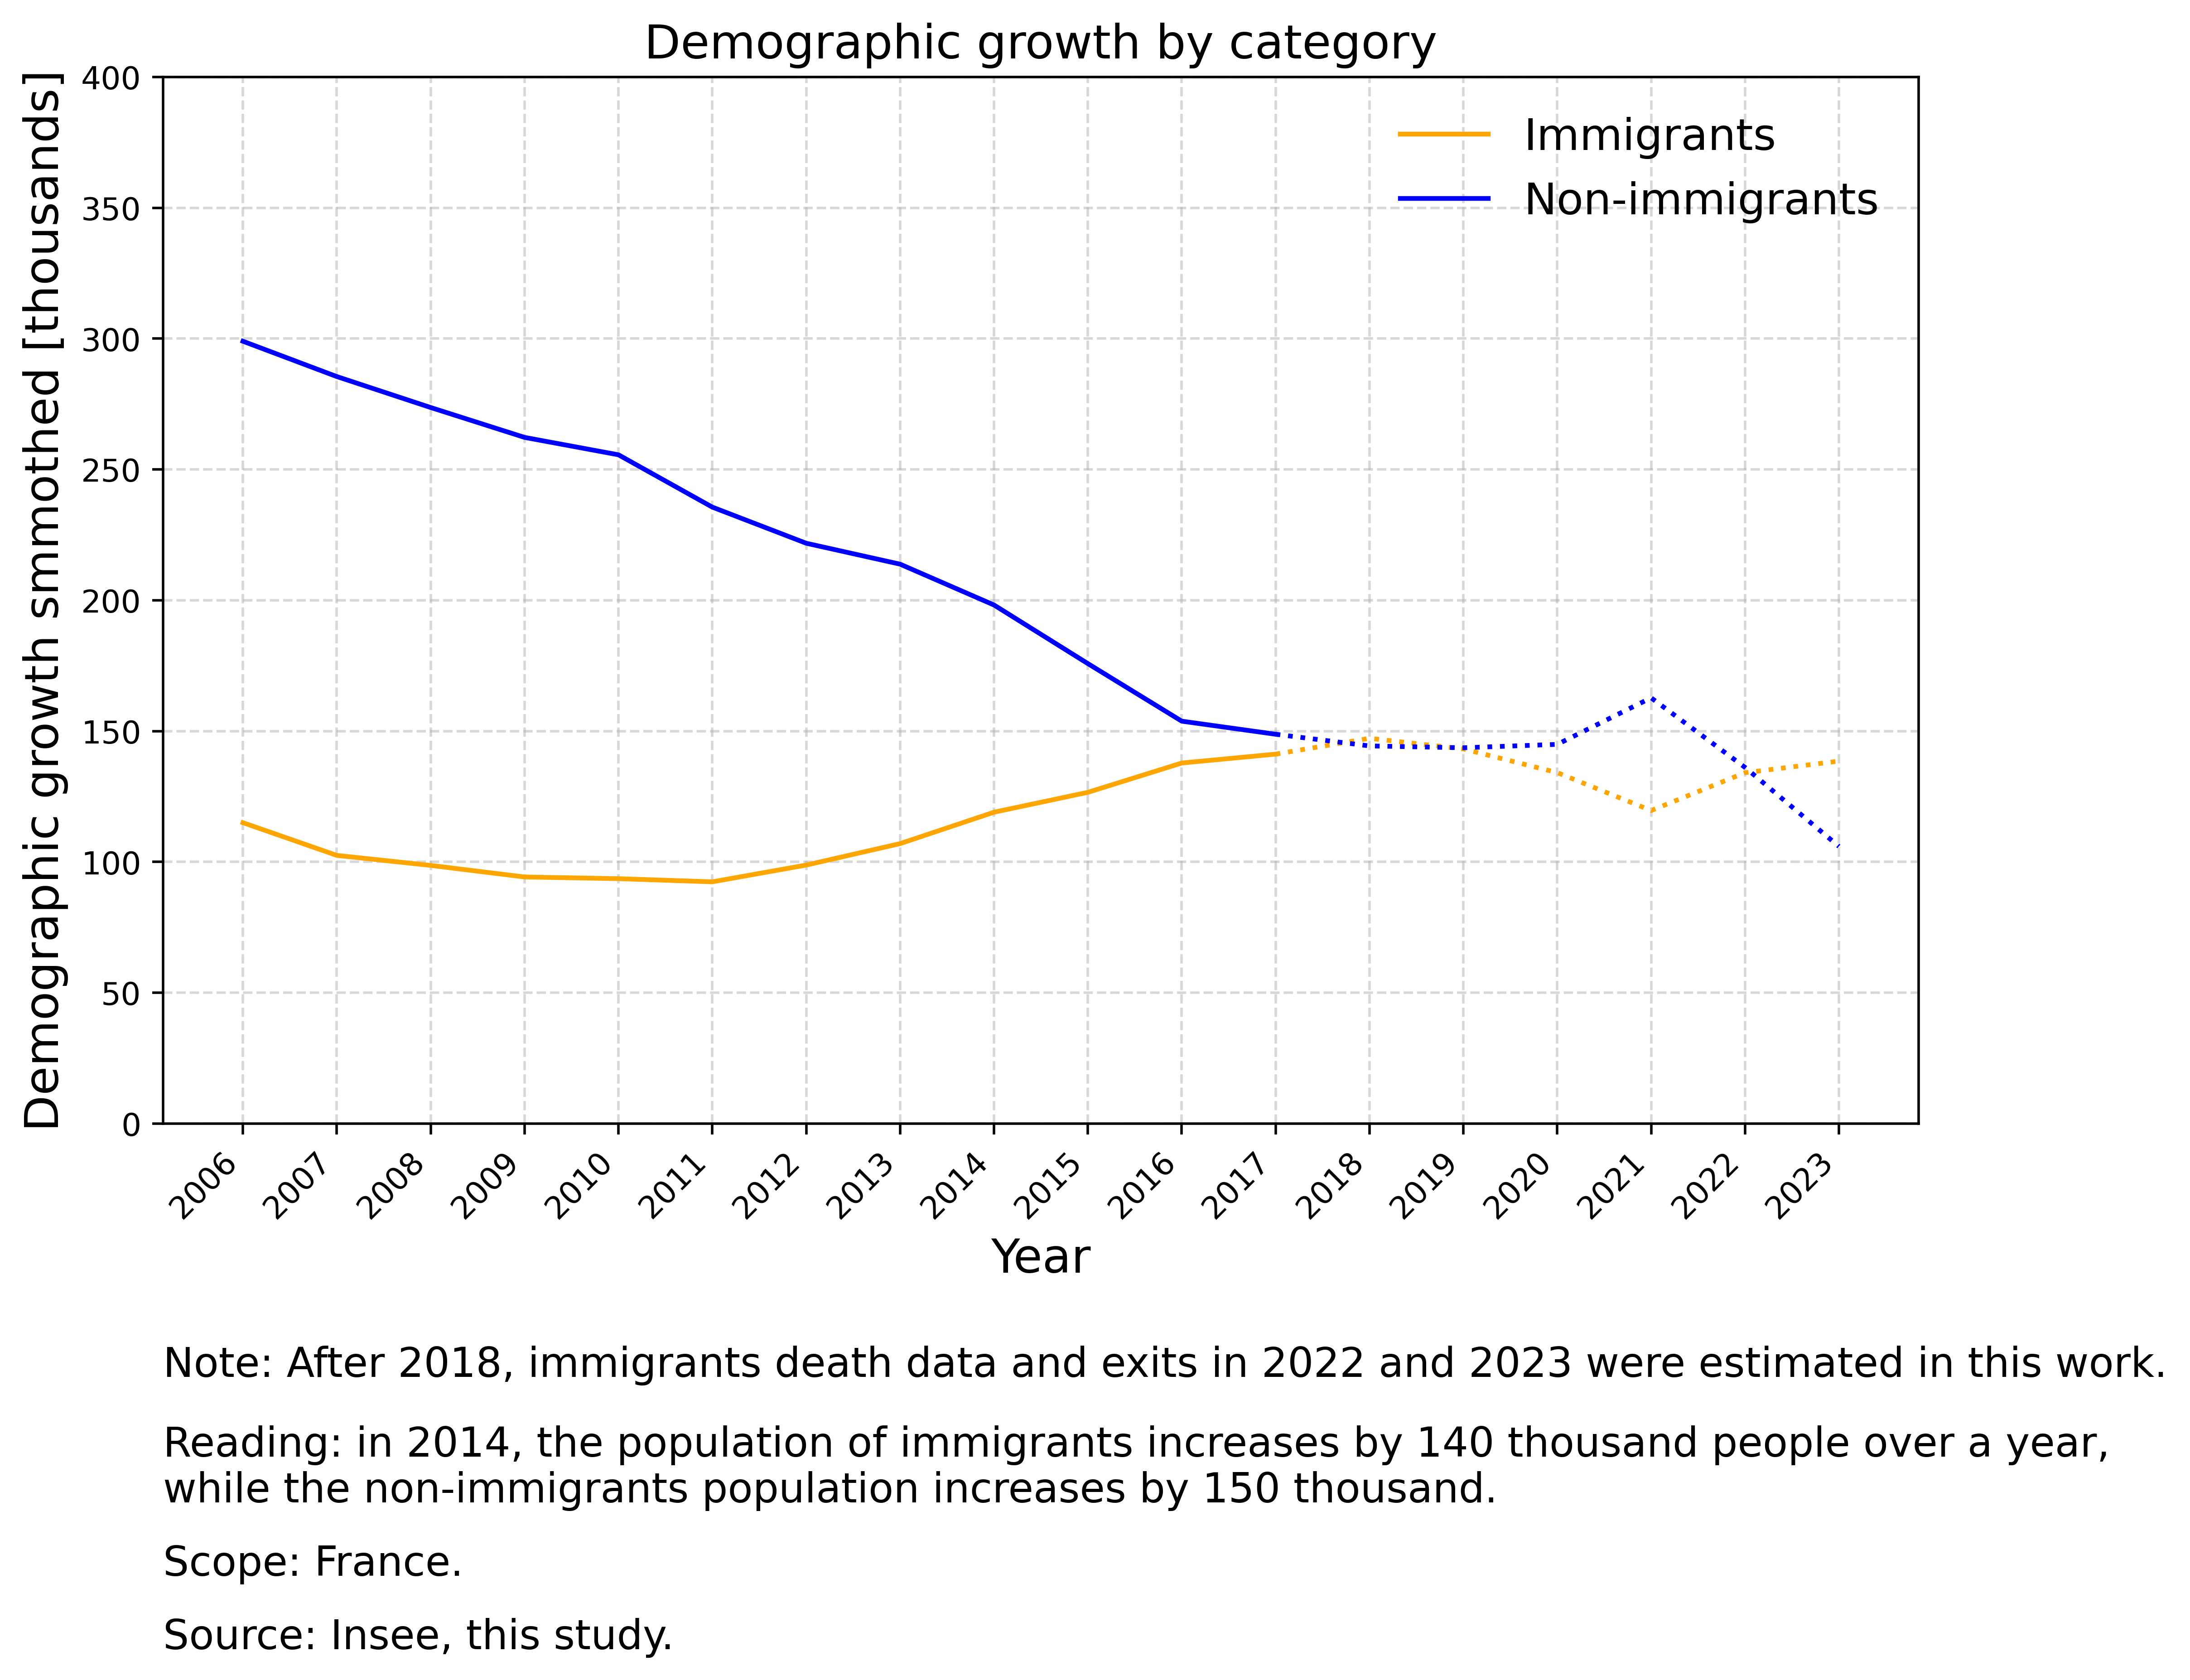

In [40]:
#### plot contribution immigrés à l'acroissement démographique ###

fig, ax = plt.subplots(figsize=(10, 6), dpi=500)

source_fr = "Insee, recencement, cette étude"
source_en = "Insee, recencement, this study"

width = 2.5
fontsize = 15

# read the graph
lecture_fr = f"en 2014, la population immigré augmente de 140 milliers de personnes sur une année,\ndans le même temps la population non-immigrés augmente de 150 milliers"
lecture_en = f"in 2014, the population of immigrants increases by 140 thousand people over a year,\nwhile the non-immigrants population increases by 150 thousand"
title_fr = "Acroissement démographique par catégorie"
title_en = "Demographic growth by category"
note_fr = "Après 2018, les données sur les décès d'immigrés et les sorties en 2022 et 2023\nont été estimés dans cette étude"
note_en = "After 2018, immigrants death data and exits in 2022 and 2023 were estimated in this work"
label_fr = "Accroissement démographique lissé [milliers]"
label_en = "Demographic growth smoothed [thousands]"

label_x = label_annee
label_leg = [label_immig, "", label_non_immig, ""]
if language == 'fr':
    label_y = label_fr
elif language == 'en':
    label_y = label_en

#df = df[df['Année']>= 2000]
# Priorité : C > ABe > ABe+
solde_immigres = df['Solde Immigrés (C)'].combine_first(
    df['Solde Immigrés (ABe)']).combine_first(df['Solde Immigrés (ABe+)'])

solde_non_immigres = df['Solde Non-immigrés (C)'].combine_first(
    df['Solde Non-immigrés (ABe)']).combine_first(df['Solde Non-immigrés (ABe+)'])

before_2018 = (df['Année'] < 2018) & (df['Année'] > 2005)
after_2017 = (df['Année'] >= 2017) & (df['Année'] < 2024)

y_i = solde_immigres
y_ni = solde_non_immigres
y_i_m = y_i.rolling(window=5, min_periods=1).mean()
y_ni_m = y_ni.rolling(window=5, min_periods=1).mean()

set_ax(ax, source_fr, source_en, note_fr, note_en, language, lecture_fr, lecture_en, title_fr, title_en, label_x, label_y, label_leg, width, fontsize)

#ax.plot(df['Année'][before_2018], solde_immigres[before_2018], marker='+', markersize=10, label=label_immig, color='orange')
#ax.plot(df['Année'][after_2017], solde_immigres[after_2017], marker='+', markersize=10,  color='orange', linestyle='dotted')
#ax.plot(df['Année'][before_2018], solde_non_immigres[before_2018], marker='+',markersize=10,  label=label_non_immig, color='blue')
#ax.plot(df['Année'][after_2017], solde_non_immigres[after_2017], marker='+', markersize=10, color='blue', linestyle='dotted')

ax.plot(df['Année'][before_2018], y_i_m[before_2018], label=label_immig, color='orange')
ax.plot(df['Année'][after_2017], y_i_m[after_2017], color='orange', linestyle='dotted')
ax.plot(df['Année'][before_2018], y_ni_m[before_2018], label=label_non_immig, color='blue')
ax.plot(df['Année'][after_2017], y_ni_m[after_2017], color='blue', linestyle='dotted')

#ax.plot(df['Année'][before_2018], (100-solde_immigres/solde_tot*100)[before_2018], marker='+', label=label_non_immig, color='blue')
#ax.plot(df['Année'][after_2017], (100-solde_immigres/solde_tot*100)[after_2017], marker='+', color='blue', linestyle='dotted')

#ax.plot(df['Année'], df['Immigrés (A)'] / df['Population (A)'] * 100, color='grey', linestyle='-')

ax.legend(fontsize=fontsize-1, frameon=False)
ax.set_ylim(0, 400)

#ax.set_xticks(df['Année'])
#ax.set_xticklabels(df['Année'].astype(str), rotation=45, ha='right')

xticks = df.loc[(df['Année'] > 2005) & (df['Année'] < 2024), 'Année'].tolist()
xtick_labels = [
    f"{year}"
    for year in xticks
]

ax.set_xticks(xticks)
ax.set_xticklabels(xtick_labels, rotation=45, ha='right')

plt.savefig(f"plots/immig_france_demo_growth_abs_smooth_"+language+f".png", dpi=500, bbox_inches='tight')

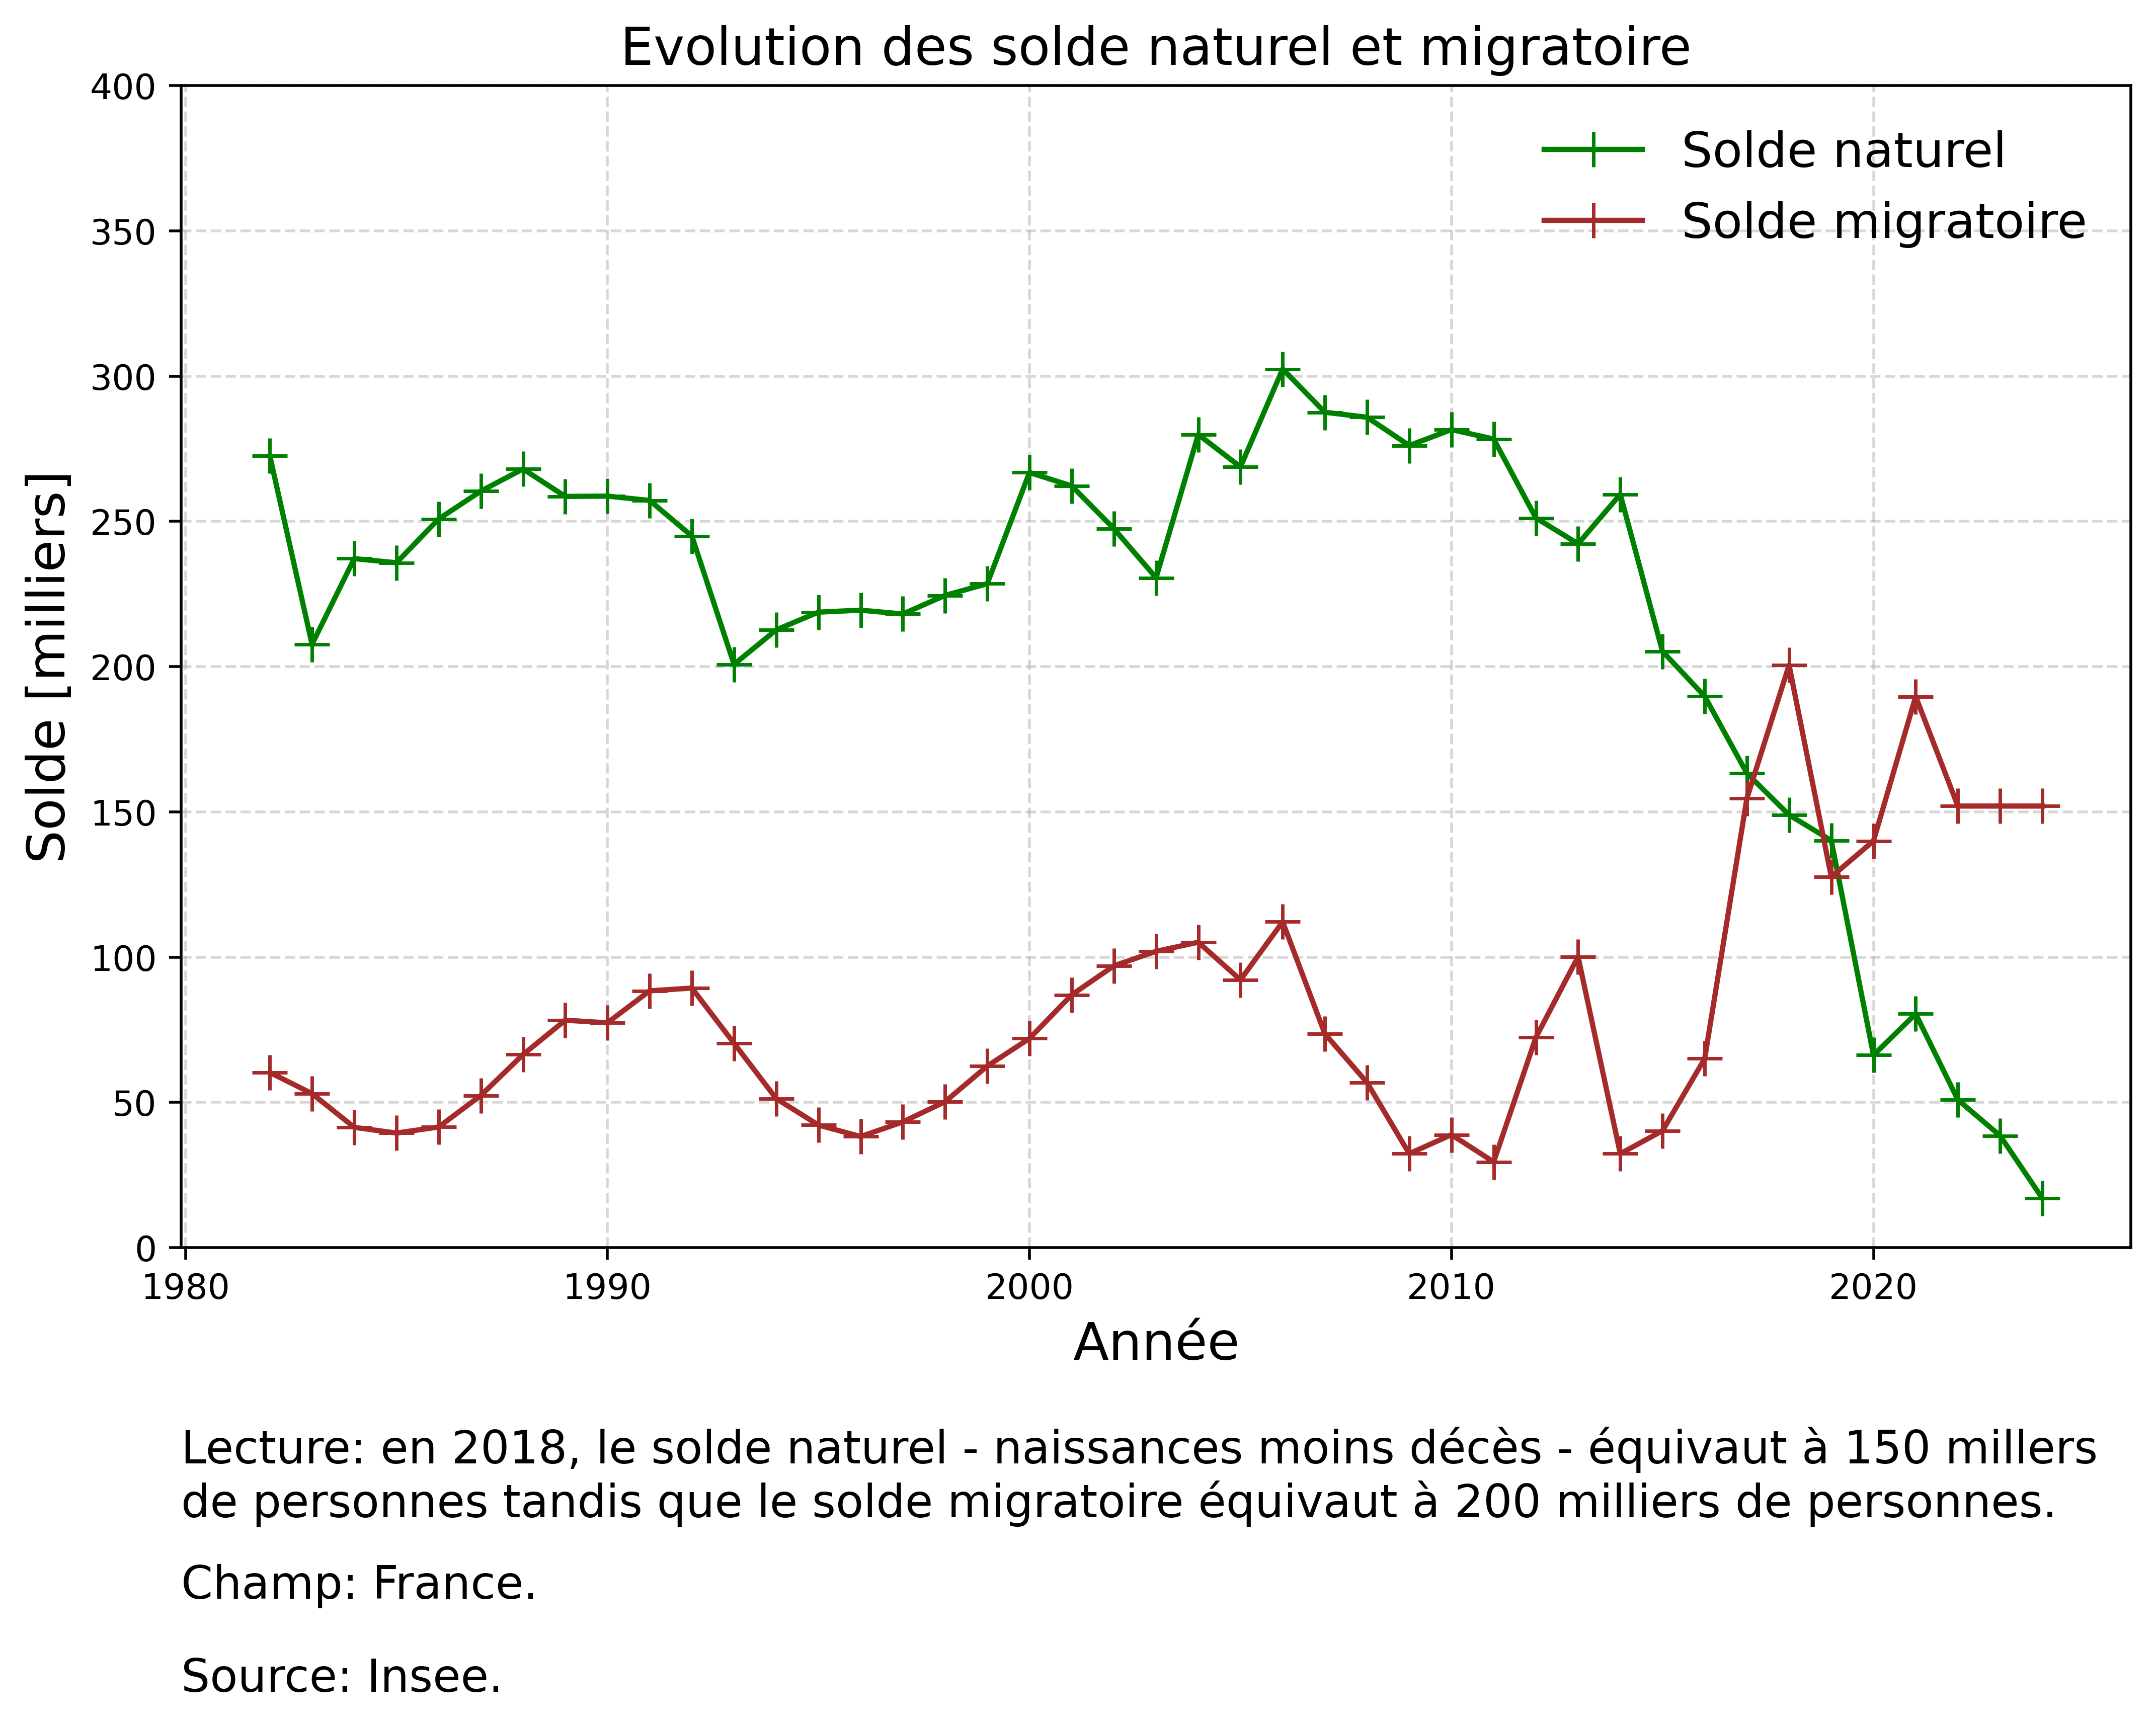

In [20]:
####  ###

fig, ax = plt.subplots(figsize=(10, 6), dpi=500)

source_fr = "Insee, recencement"
source_en = "Insee, recencement"

width = 2.5
fontsize = 15

# read the graph
lecture_fr = f"en 2018, le solde naturel - naissances moins décès - équivaut à 150 millers\nde personnes tandis que le solde migratoire équivaut à 200 milliers de personnes"
lecture_en = f"in 2018, the natural balance - births minus deaths - is equivalent to 150 thousand\npeople, while net migration is equivalent to 200 thousand people"
title_fr = "Evolution des solde naturel et migratoire"
title_en = "Evolution of the natural balance and net migration"
note_fr = ""
note_en = ""
label_fr = "Solde [milliers]"
label_en = "Balance [thousands]"
label_sn_fr = "Solde naturel"
label_sn_en = "Natural balance"
label_sm_fr = "Solde migratoire"
label_sm_en = "Net migration"

label_x = label_annee
label_leg = [label_immig, "", label_non_immig, ""]

if language == 'fr':
    label_y = label_fr
    label_sn =  label_sn_fr
    label_sm =  label_sm_fr
elif language == 'en':
    label_y = label_en
    label_sn =  label_sn_en
    label_sm =  label_sm_en
    

#df = df[df['Année']>= 2000]
# Priorité : C > ABe > ABe+
solde_immigres = df['Solde Immigrés (C)'].combine_first(
    df['Solde Immigrés (ABe)']).combine_first(df['Solde Immigrés (ABe+)'])

solde_non_immigres = df['Solde Non-immigrés (C)'].combine_first(
    df['Solde Non-immigrés (ABe)']).combine_first(df['Solde Non-immigrés (ABe+)'])

solde_tot = df['Solde (C)'].combine_first(
    df['Solde (ABe)']).combine_first(df['Solde (ABe+)'])

before_2018 = (df['Année'] < 2018) & (df['Année'] > 2005)
after_2017 = df['Année'] >= 2017

df_ = df[(df['Année']> 1975) & (df['Année'] < 2025)]

set_ax(ax, source_fr, source_en, note_fr, note_en, language, lecture_fr, lecture_en, title_fr, title_en, label_x, label_y, label_leg, width, fontsize)

#ax.plot(df['Année'][before_2018], solde_immigres[before_2018], marker='+', label=label_immig, color='orange')
#ax.plot(df['Année'][after_2017], solde_immigres[after_2017], marker='+', color='orange', linestyle='dotted')
ax.plot(df_['Année'], df_['Solde naturel (A)'], marker='+',markersize=10, label=label_sn, color='green')
ax.plot(df_['Année'], df_['Solde migratoire (A)'], marker='+', markersize=10, label=label_sm, color='brown')

#ax.plot(df['Année'][before_2018], (100-solde_immigres/solde_tot*100)[before_2018], marker='+', label=label_non_immig, color='blue')
#ax.plot(df['Année'][after_2017], (100-solde_immigres/solde_tot*100)[after_2017], marker='+', color='blue', linestyle='dotted')

#ax.plot(df['Année'], df['Immigrés (A)'] / df['Population (A)'] * 100, color='grey', linestyle='-')

ax.legend(fontsize=fontsize-1, frameon=False)
ax.set_ylim(0, 400)

#ax.set_xticks(df_['Année'])
#ax.set_xticklabels(df_['Année'], rotation=45, ha='right')

plt.savefig(f"plots/immig_france_solde_"+language+f".png", dpi=500, bbox_inches='tight')

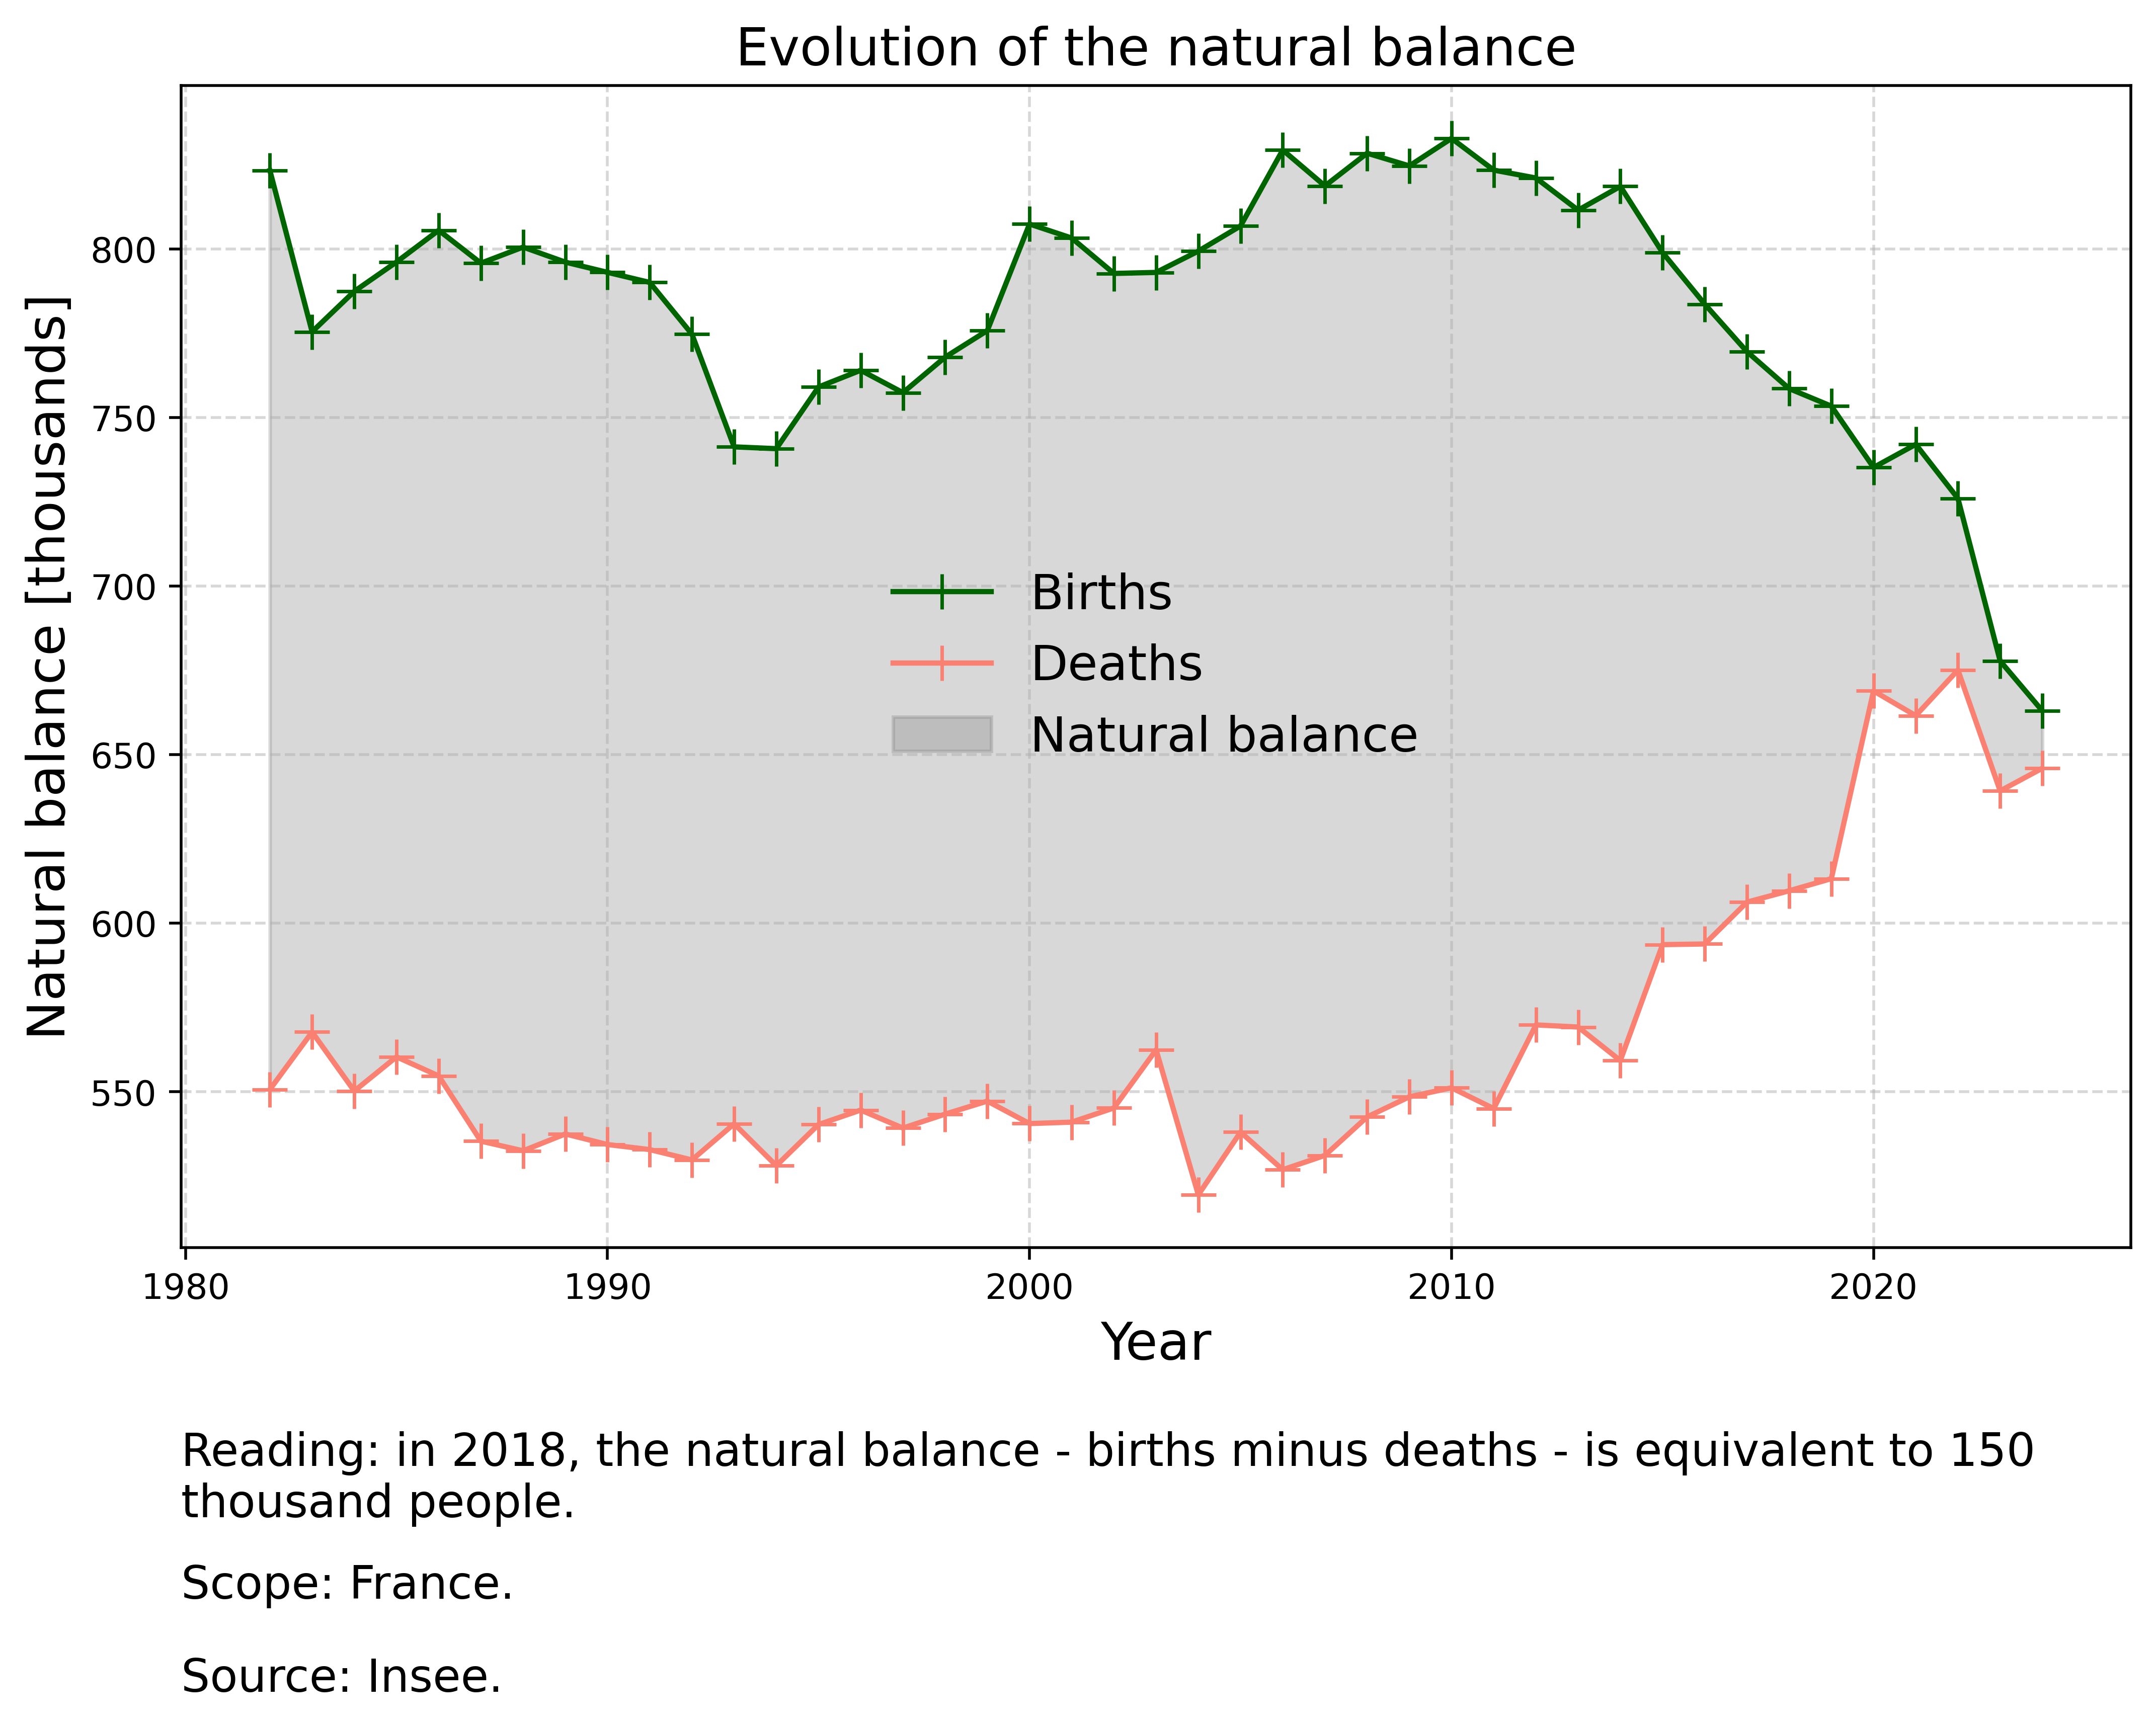

In [17]:
####  ###

fig, ax = plt.subplots(figsize=(10, 6), dpi=500)

source_fr = "Insee, recencement"
source_en = "Insee, recencement"

width = 2.5
fontsize = 15

# read the graph
lecture_fr = f"en 2018, le solde naturel - naissances moins décès - équivaut à 150 millers\nde personnes"
lecture_en = f"in 2018, the natural balance - births minus deaths - is equivalent to 150\nthousand people"
title_fr = "Evolution du solde naturel"
title_en = "Evolution of the natural balance"
note_fr = ""
note_en = ""
label_fr = "Solde naturel"
label_en = "Natural balance"
label_y_fr = "Solde naturel [milliers]"
label_y_en = "Natural balance [thousands]"
label_sn_fr = "Naissances"
label_sn_en = "Births"
label_sm_fr = "Décès"
label_sm_en = "Deaths"

label_x = label_annee
label_leg = [label_immig, "", label_non_immig, ""]

if language == 'fr':
    label_y = label_y_fr
    label = label_fr
    label_sn =  label_sn_fr
    label_sm =  label_sm_fr
elif language == 'en':
    label_y = label_y_en
    label = label_en
    label_sn =  label_sn_en
    label_sm =  label_sm_en

#df = df[df['Année']>= 2000]
# Priorité : C > ABe > ABe+
solde_immigres = df['Solde Immigrés (C)'].combine_first(
    df['Solde Immigrés (ABe)']).combine_first(df['Solde Immigrés (ABe+)'])

solde_non_immigres = df['Solde Non-immigrés (C)'].combine_first(
    df['Solde Non-immigrés (ABe)']).combine_first(df['Solde Non-immigrés (ABe+)'])

solde_tot = df['Solde (C)'].combine_first(
    df['Solde (ABe)']).combine_first(df['Solde (ABe+)'])

before_2018 = (df['Année'] < 2018) & (df['Année'] > 2005)
after_2017 = df['Année'] >= 2017

df_ = df[(df['Année']> 1975) & (df['Année'] < 2025)]

set_ax(ax, source_fr, source_en, note_fr, note_en, language, lecture_fr, lecture_en, title_fr, title_en, label_x, label_y, label_leg, width, fontsize)


ax.plot(df_['Année'], df_['Naissances (A)'], marker='+',markersize=10, label=label_sn, color='darkgreen')
ax.plot(df_['Année'], df_['Décès (A)'], marker='+', markersize=10, label=label_sm, color='salmon')

ax.fill_between(df_['Année'],
                df_['Naissances (A)'],
                df_['Décès (A)'],
                color='gray', alpha=0.3, label=label)

ax.legend(fontsize=fontsize-1, frameon=False)
#ax.set_ylim(0, 400)

plt.savefig(f"plots/immig_france_solde_nat_"+language+f".png", dpi=500, bbox_inches='tight')

0     1921
1     1926
2     1931
3     1936
4     1946
5     1954
6     1962
7     1968
8     1975
9     1982
10    1983
11    1984
12    1985
13    1986
14    1987
15    1988
16    1989
17    1990
18    1991
19    1992
20    1993
21    1994
22    1995
23    1996
24    1997
25    1998
26    1999
27    2000
28    2001
29    2002
30    2003
31    2004
32    2005
33    2006
34    2007
35    2008
36    2009
37    2010
38    2011
39    2012
40    2013
41    2014
42    2015
43    2016
44    2017
45    2018
46    2019
47    2020
48    2021
49    2022
50    2023
51    2024
52    2025
Name: Année, dtype: int64


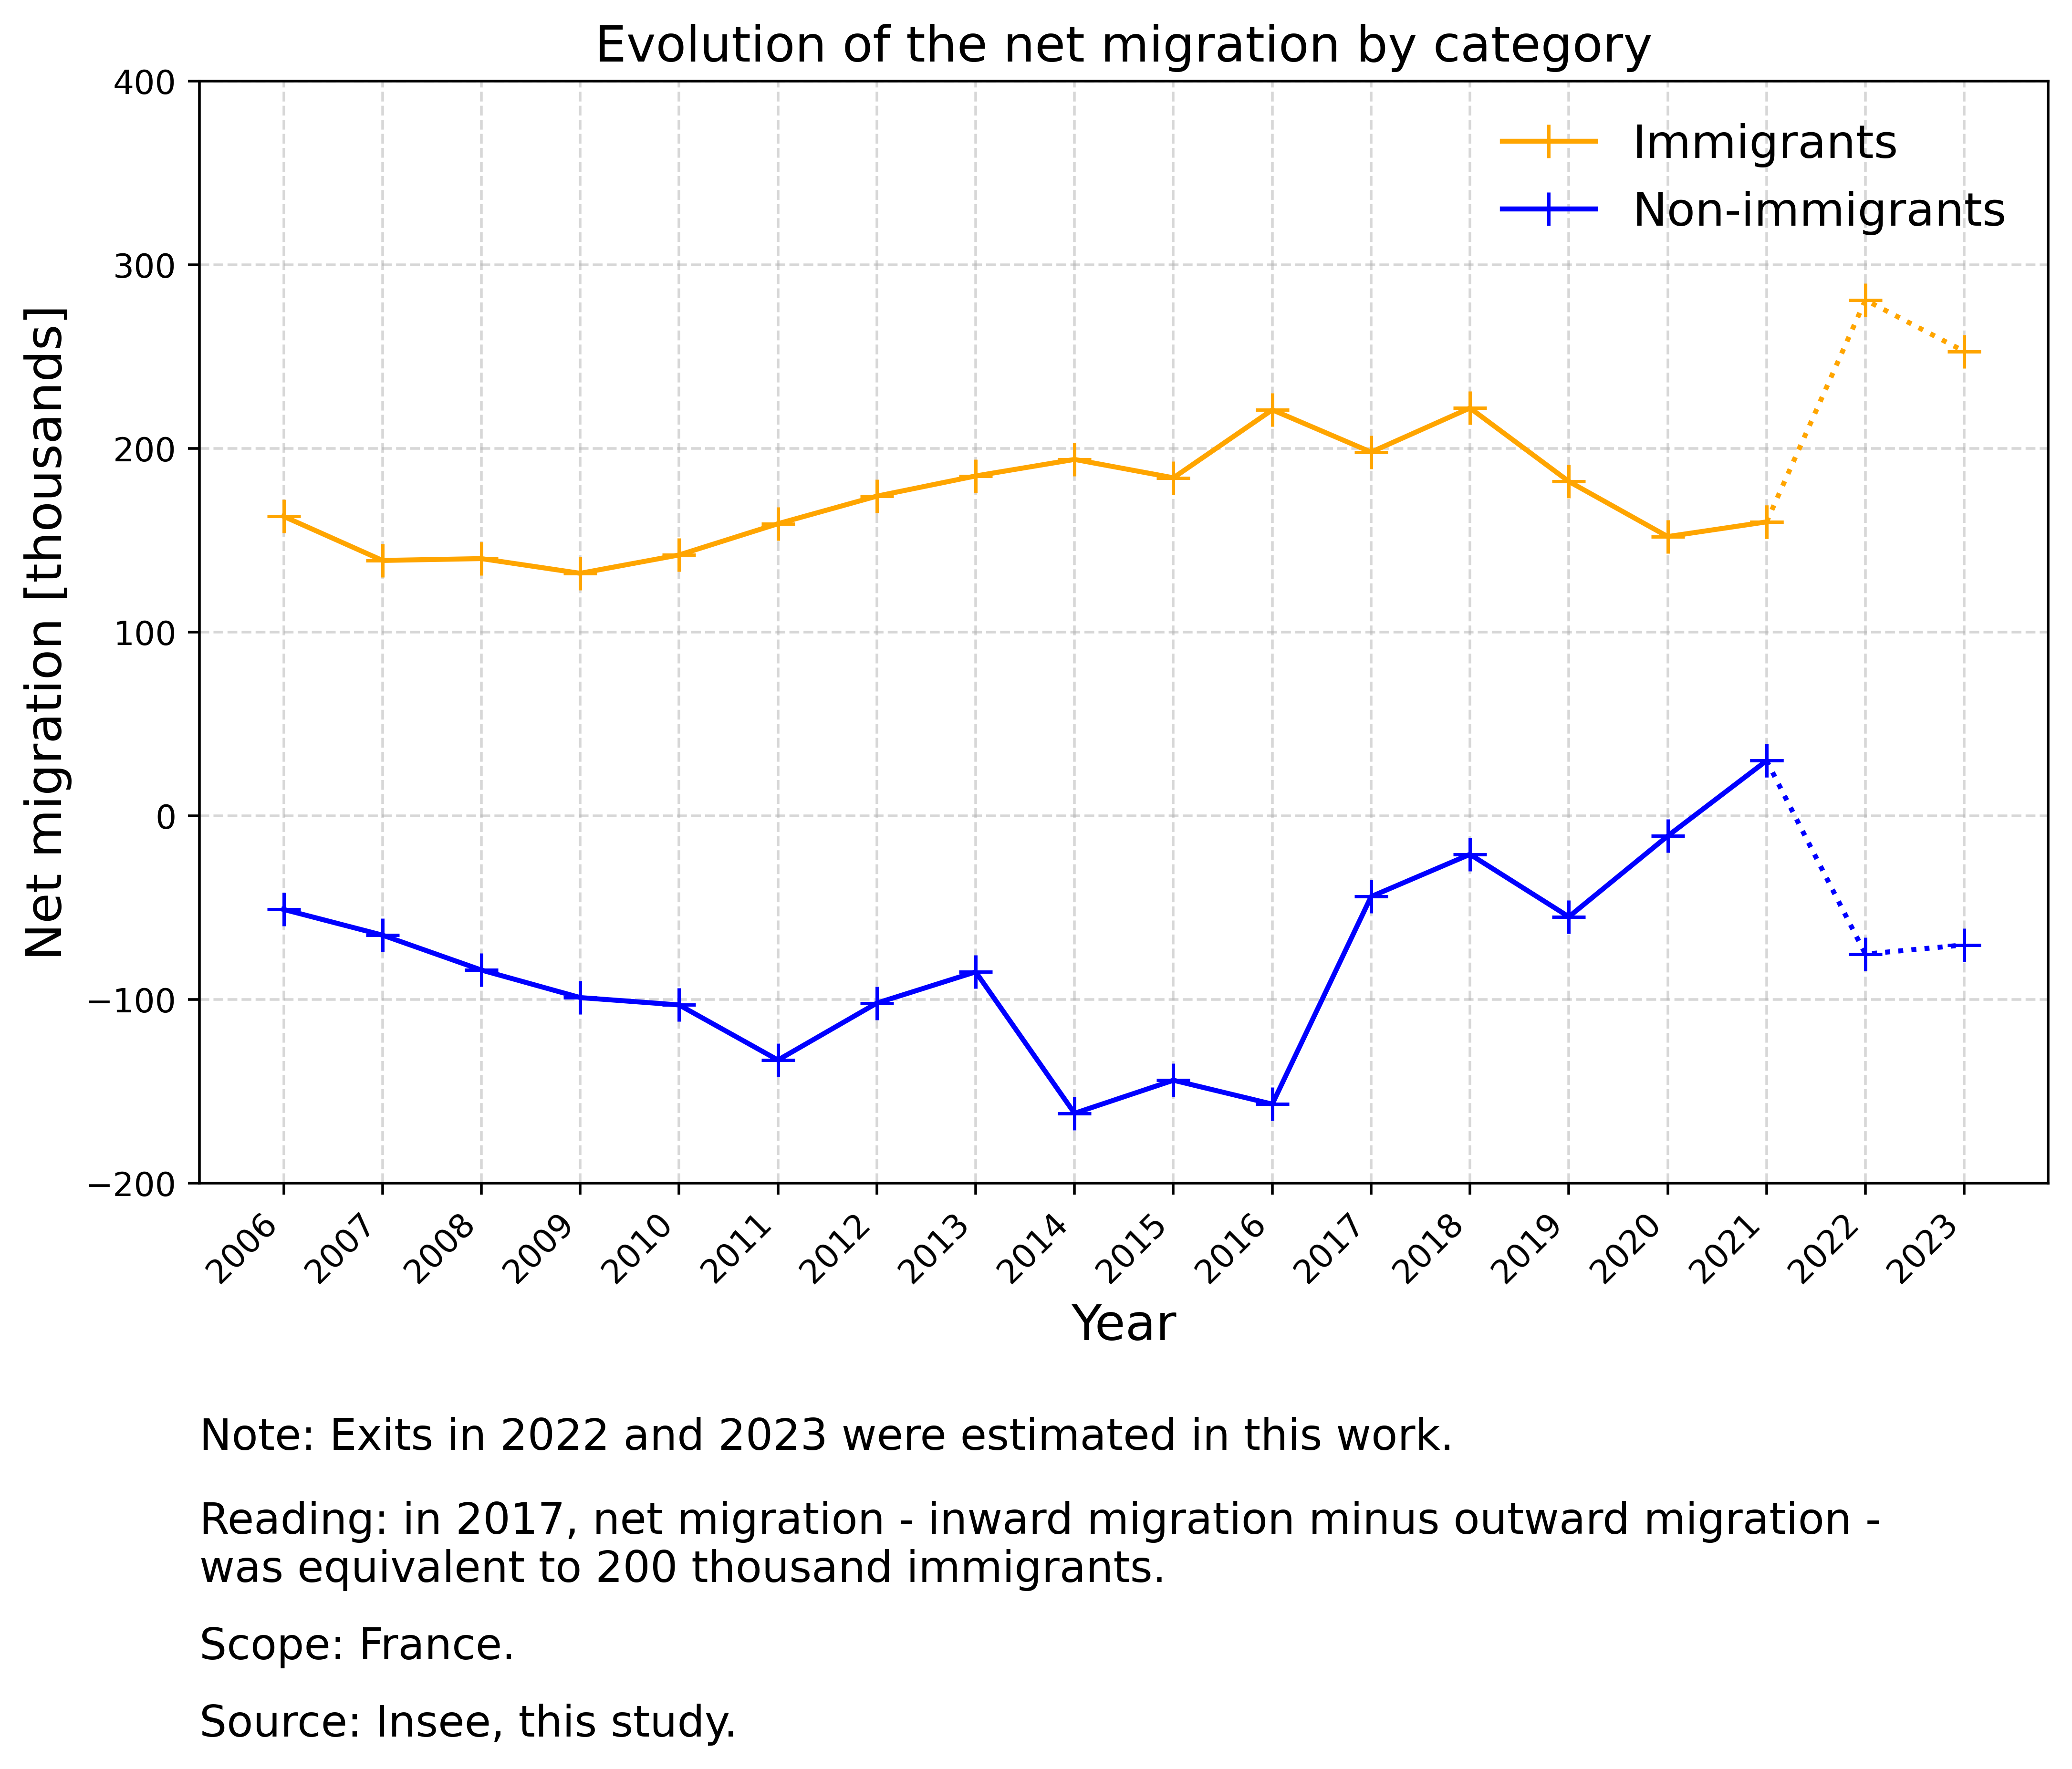

In [6]:
#### solde migratoire par cat.  ###

fig, ax = plt.subplots(figsize=(10, 6), dpi=500)
print(df['Année'])
source_fr = "Insee, recencement, cette étude"
source_en = "Insee, recencement, this study"

width = 2.5
fontsize = 15

# read the graph
lecture_fr = f"en 2017, le solde migratoire - entrées moins sorties - des immigrés\néquivaut à 200 milliers d'immigrés"
lecture_en = f"in 2017, net migration - inward migration minus outward migration -\nwas equivalent to 200 thousand immigrants"
title_fr = "Evolution du solde migratoire par catégorie"
title_en = "Evolution of the net migration by category"
note_fr = "Les sorties en 2022 et 2023 ont été estimées dans cette étude"
note_en = "Exits in 2022 and 2023 were estimated in this work"
label_fr = "Solde migratoire [milliers]"
label_en = "Net migration [thousands]"

label_x = label_annee
label_leg = [label_immig, "", label_non_immig, ""]
if language == 'fr':
    label_y = label_fr
elif language == 'en':
    label_y = label_en

#df = df[df['Année']>= 2000]
# Priorité : C > ABe > ABe+
solde_mig_immigres = df['Solde migratoire Immigrés (B)'].combine_first(
    df['Solde migratoire Immigrés (ABe)'])

solde_mig_non_immigres = df['Solde migratoire Non-immigrés (B)'].combine_first(
    df['Solde migratoire Non-immigrés (ABe)'])

solde_mig_tot = df['Solde migratoire (B)'].combine_first(
    df['Solde migratoire (ABe)'])

before_2022 = (df['Année'] < 2022) & (df['Année'] > 2005)
after_2021 = (df['Année'] > 2020) & (df['Année'] < 2024)

df_ = df[(df['Année']> 2005) & (df['Année'] < 2024)]

set_ax(ax, source_fr, source_en, note_fr, note_en, language, lecture_fr, lecture_en, title_fr, title_en, label_x, label_y, label_leg, width, fontsize)

ax.plot(df_['Année'][before_2022], solde_mig_immigres[before_2022], marker='+', markersize=10, label=label_immig, color='orange')
ax.plot(df_['Année'][after_2021], solde_mig_immigres[after_2021], marker='+', markersize=10, color='orange', linestyle='dotted')
ax.plot(df_['Année'][before_2022], solde_mig_non_immigres[before_2022], marker='+', markersize=10, label=label_non_immig, color='blue')
ax.plot(df_['Année'][after_2021], solde_mig_non_immigres[after_2021], marker='+', markersize=10, color='blue', linestyle='dotted')

ax.legend(fontsize=fontsize-1, frameon=False)
ax.set_ylim(-200, 400)

ax.set_xticks(df_['Année'])
ax.set_xticklabels(df_['Année'], rotation=45, ha='right')

plt.savefig(f"plots/immig_france_solde_cat_"+language+f".png", dpi=500, bbox_inches='tight')

0     1921
1     1926
2     1931
3     1936
4     1946
5     1954
6     1962
7     1968
8     1975
9     1982
10    1983
11    1984
12    1985
13    1986
14    1987
15    1988
16    1989
17    1990
18    1991
19    1992
20    1993
21    1994
22    1995
23    1996
24    1997
25    1998
26    1999
27    2000
28    2001
29    2002
30    2003
31    2004
32    2005
33    2006
34    2007
35    2008
36    2009
37    2010
38    2011
39    2012
40    2013
41    2014
42    2015
43    2016
44    2017
45    2018
46    2019
47    2020
48    2021
49    2022
50    2023
51    2024
52    2025
Name: Année, dtype: int64


NameError: name 'Line2D' is not defined

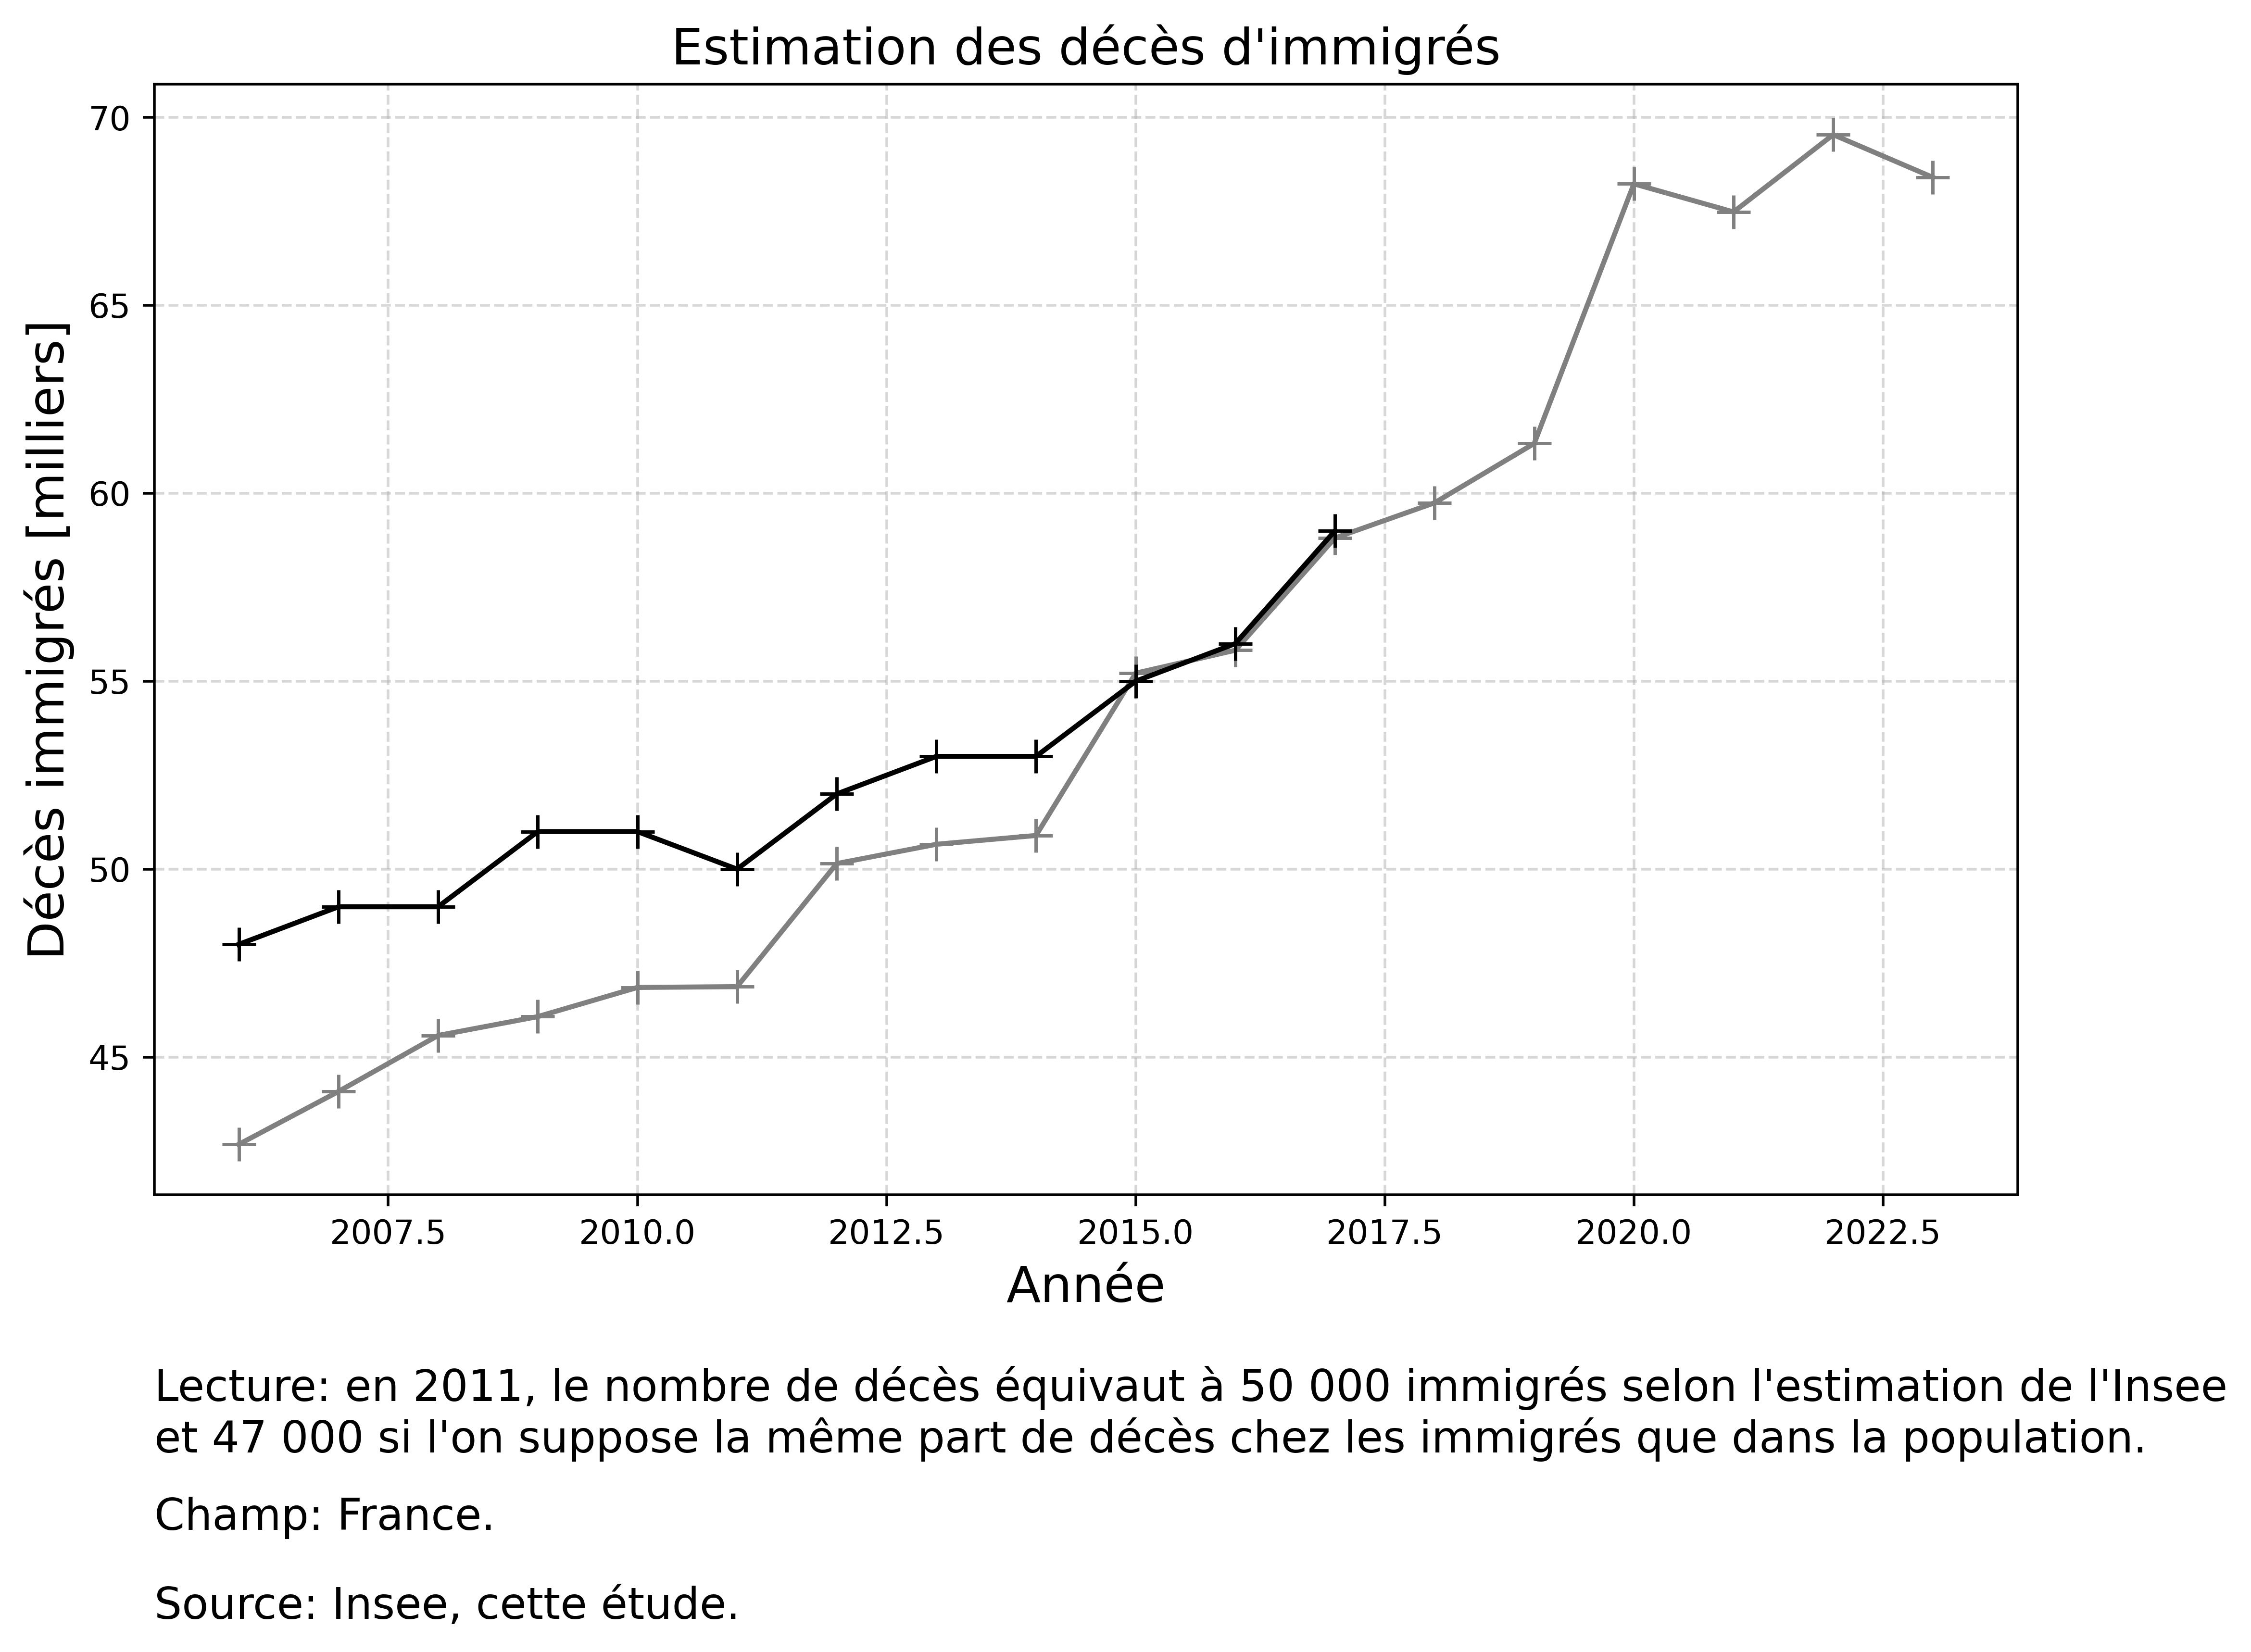

In [23]:
#### erreur hypothese décès suit % immigrés ###

fig, ax = plt.subplots(figsize=(10, 6), dpi=500)
print(df['Année'])
source_fr = "Insee, recencement, cette étude"
source_en = "Insee, recencement, this study"

width = 2.5
fontsize = 15

# read the graph
lecture_fr = f"en 2011, le nombre de décès équivaut à 50 000 immigrés selon l'estimation de l'Insee\net 47 000 si l'on suppose la même part de décès chez les immigrés que dans la population"
lecture_en = f"in 2011, the number of deaths was equivalent to 50 000 immigrants according to the Insee\nestimate and 47 000 if we assume the same proportion of deaths among immigrants as among the population"
title_fr = "Estimation des décès d'immigrés"
title_en = "Estimated immigrant deaths"
note_fr = ""
note_en = ""
label_fr = "Décès immigrés [milliers]"
label_en = "Immigrants death [thousands]"
label_leg_fr = "Estimation, cette étude"
label_leg_en = "Estimation, this work"
label_insee = "Estimation, Insee"

label_x = label_annee

if language == 'fr':
    label_y = label_fr
    label_leg = label_leg_fr
elif language == 'en':
    label_y = label_en
    label_leg = label_leg_en

df_ = df[df['Année']> 2005]


#ax.plot(df['Année'], df['Immigrés (A)']/df['Population (A)']*100, marker='+', label='I', color='blue')

set_ax(ax, source_fr, source_en, note_fr, note_en, language, lecture_fr, lecture_en, title_fr, title_en, label_x, label_y, label_leg, width, fontsize)

ax.plot(df_['Année'], df_['Décès Immigrés (Ae)'], marker='+', label= label_leg, markersize=10, color='grey')
ax.plot(df_['Année'], df_['Décès Immigrés (BC)'], marker='+', label= label_insee, markersize=10, color='black')

ax.legend(fontsize=fontsize-1, frameon=False)

df['Error Décès Immigrés (Ae)'] = (df['Décès Immigrés (BC)'] - df['Décès Immigrés (Ae)']).abs() / df['Décès Immigrés (BC)'] 
print(df['Error Décès Immigrés (Ae)'].mean())

ax.set_ylim(30, 90)

ax.set_xticks(df_['Année'])
ax.set_xticklabels(df_['Année'].astype(str), rotation=45, ha='right')

plt.savefig(f"plots/immig_france_err_deaths_"+language+f".png", dpi=500, bbox_inches='tight')

0     1921
1     1926
2     1931
3     1936
4     1946
5     1954
6     1962
7     1968
8     1975
9     1982
10    1983
11    1984
12    1985
13    1986
14    1987
15    1988
16    1989
17    1990
18    1991
19    1992
20    1993
21    1994
22    1995
23    1996
24    1997
25    1998
26    1999
27    2000
28    2001
29    2002
30    2003
31    2004
32    2005
33    2006
34    2007
35    2008
36    2009
37    2010
38    2011
39    2012
40    2013
41    2014
42    2015
43    2016
44    2017
45    2018
46    2019
47    2020
48    2021
49    2022
50    2023
51    2024
52    2025
Name: Année, dtype: int64
0.054248389345491775


/var/folders/k6/qg3z0g1s14b6gmg24xwcgvgw0000gn/T/ipykernel_1446/2464901153.py:41: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  ax.plot(df_[df['Année'] < 2022]['Année'], df_[df['Année'] < 2022]['Sorties Immigrés (B)'], marker='+', label= label_insee, markersize=10, color='black')
/var/folders/k6/qg3z0g1s14b6gmg24xwcgvgw0000gn/T/ipykernel_1446/2464901153.py:41: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  ax.plot(df_[df['Année'] < 2022]['Année'], df_[df['Année'] < 2022]['Sorties Immigrés (B)'], marker='+', label= label_insee, markersize=10, color='black')


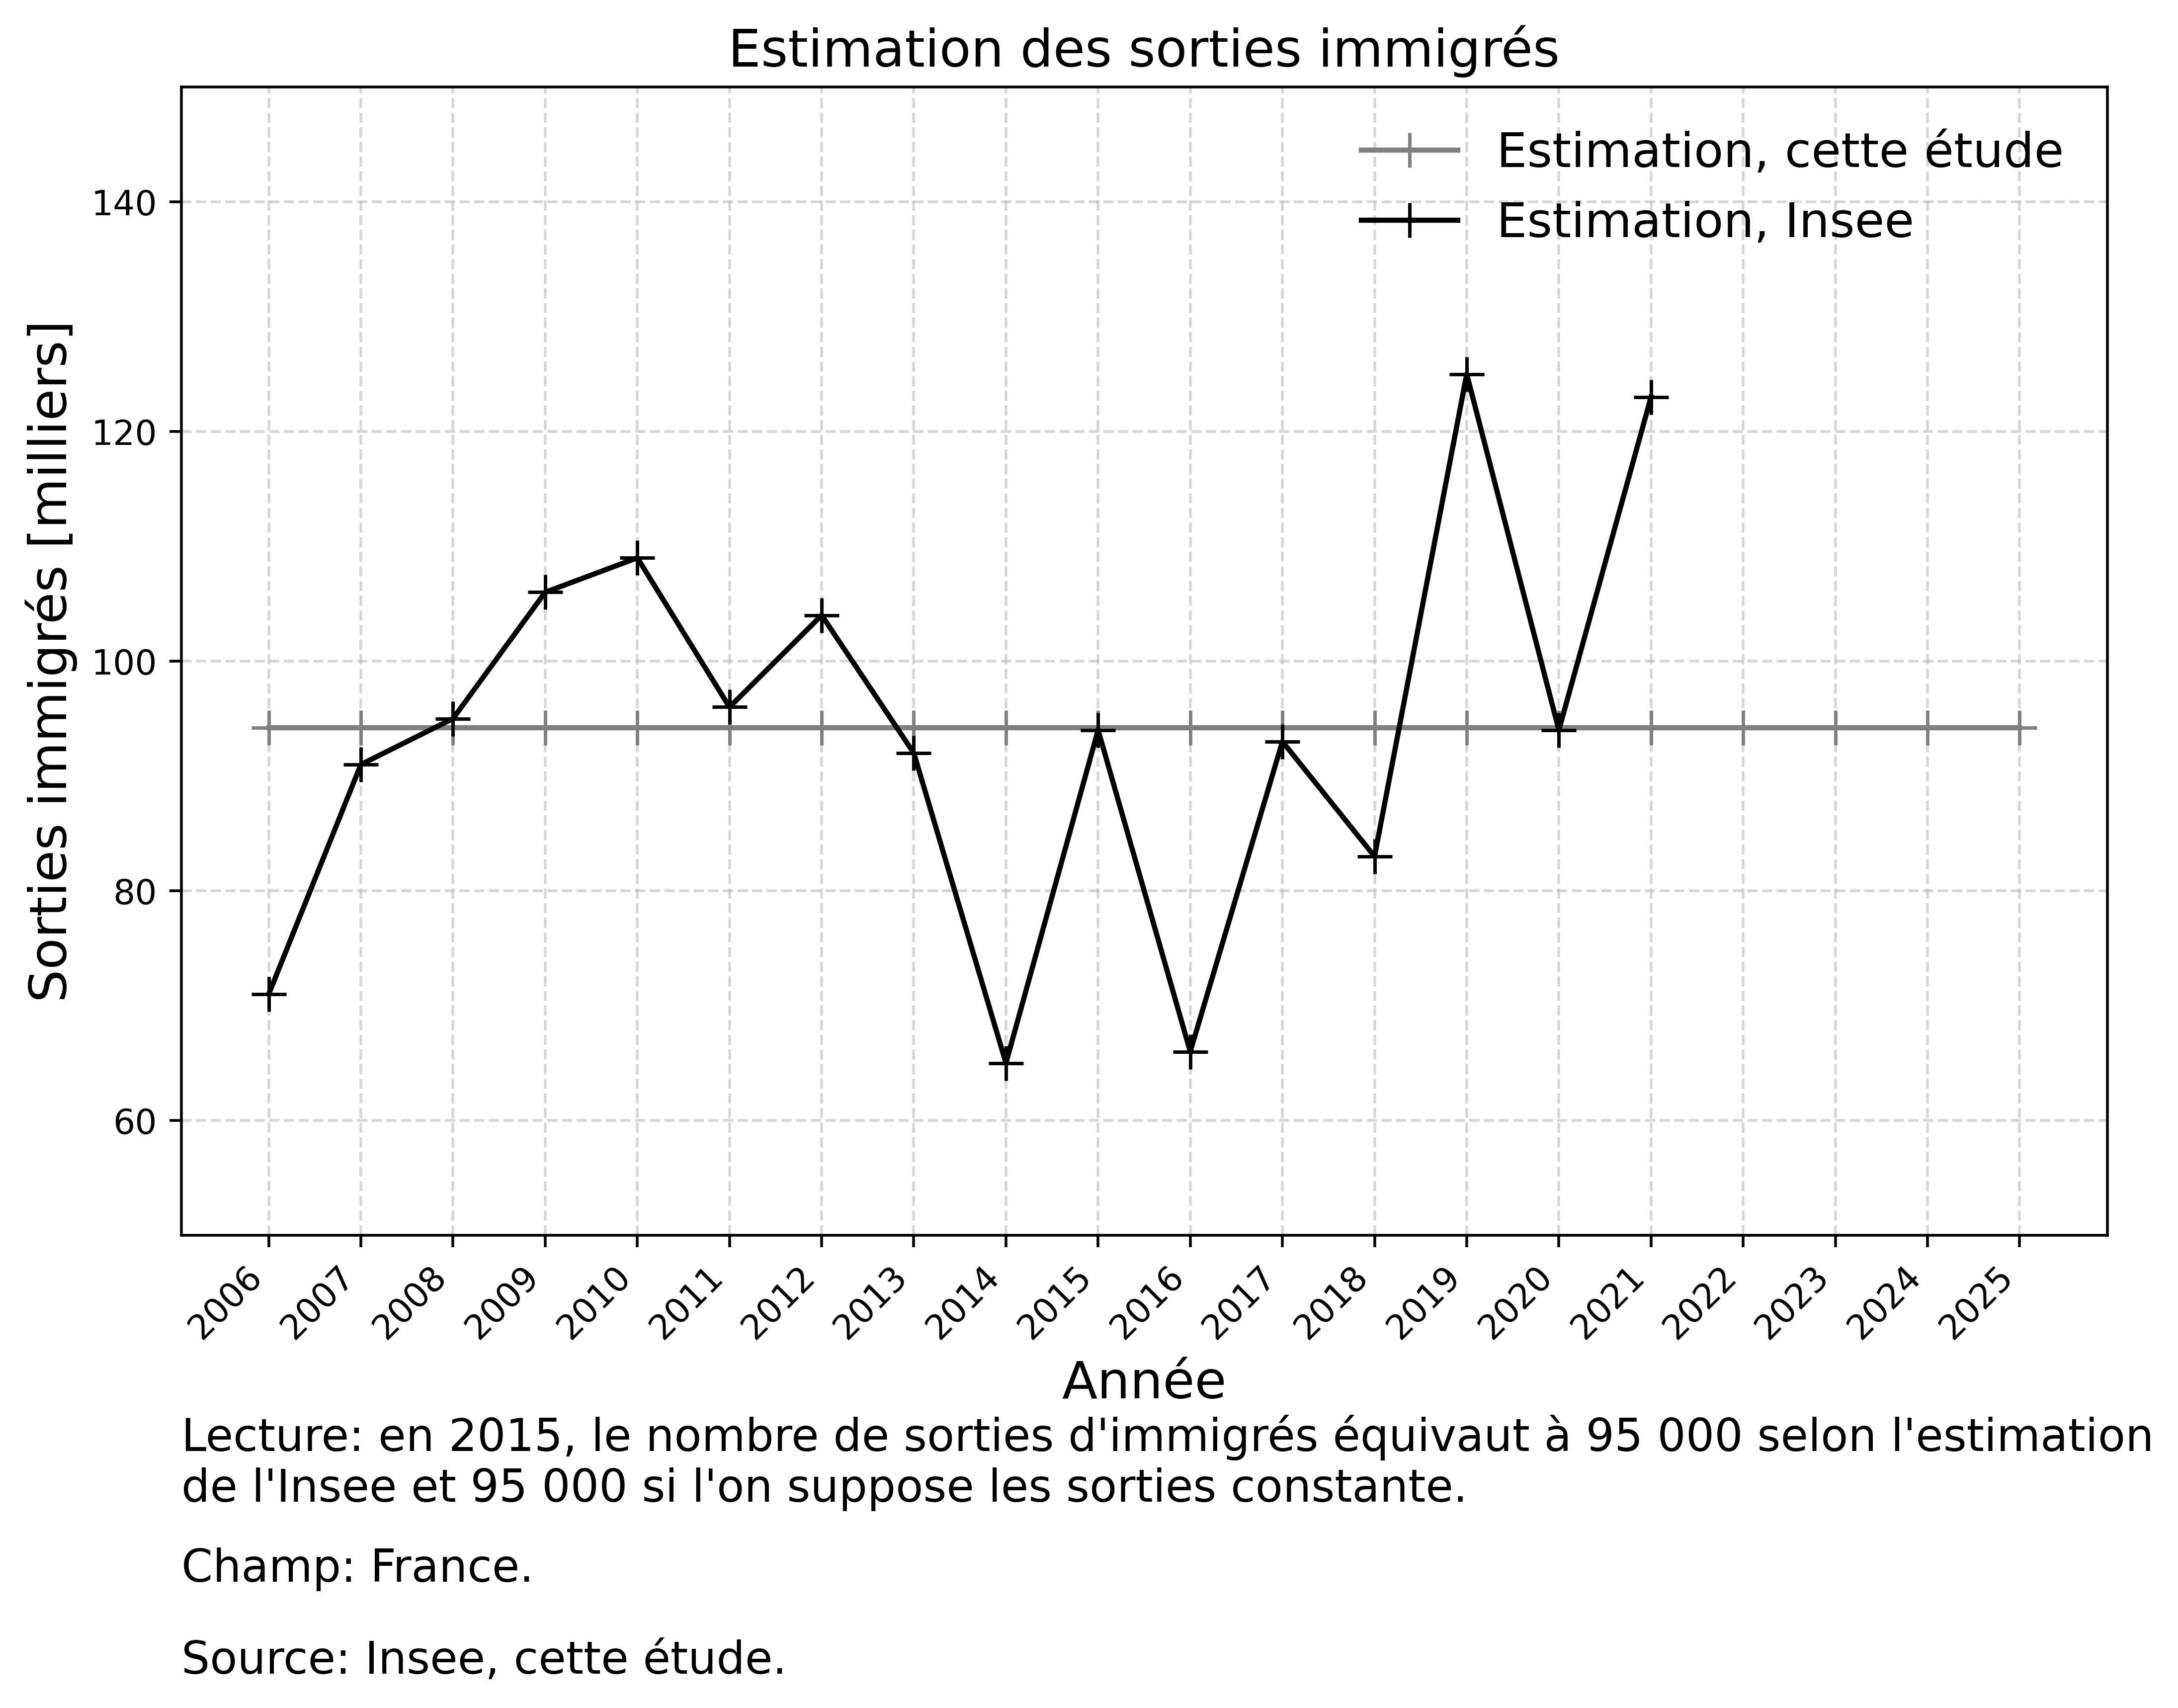

In [21]:
#### erreur hypothese sorties constante ###

fig, ax = plt.subplots(figsize=(10, 6), dpi=500)
print(df['Année'])
source_fr = "Insee, recencement, cette étude"
source_en = "Insee, recencement, this study"

width = 2.5
fontsize = 15

# read the graph
lecture_fr = f"en 2015, le nombre de sorties d'immigrés équivaut à 95 000 selon l'estimation\nde l'Insee et 95 000 si l'on suppose les sorties constante"
lecture_en = f"in 2015, the number of immigrant exits is equivalent to 95 000 according\nto the Insee estimate and 95 000 if we assume the exits are constant"
title_fr = "Estimation des sorties immigrés"
title_en = "Estimated immigrant exits"
note_fr = ""
note_en = ""
label_fr = "Sorties immigrés [milliers]"
label_en = "Immigrants exits [thousands]"
label_leg_fr = "Estimation, cette étude"
label_leg_en = "Estimation, this work"
label_insee = "Estimation, Insee"

label_x = label_annee

if language == 'fr':
    label_y = label_fr
    label_leg = label_leg_fr
elif language == 'en':
    label_y = label_en
    label_leg = label_leg_en

df_ = df[(df['Année'] > 2005)]


#ax.plot(df['Année'], df['Immigrés (A)']/df['Population (A)']*100, marker='+', label='I', color='blue')

set_ax(ax, source_fr, source_en, note_fr, note_en, language, lecture_fr, lecture_en, title_fr, title_en, label_x, label_y, label_leg, width, fontsize)

ax.plot(df_['Année'], df_['Sorties Immigrés (ABe)'], marker='+', label= label_leg, markersize=10, color='grey')
ax.plot(df_[df['Année'] < 2022]['Année'], df_[df['Année'] < 2022]['Sorties Immigrés (B)'], marker='+', label= label_insee, markersize=10, color='black')

ax.legend(fontsize=fontsize-1, frameon=False)

df['Error Décès Immigrés (Ae)'] = (df['Décès Immigrés (BC)'] - df['Décès Immigrés (Ae)']).abs() / df['Décès Immigrés (BC)'] 
print(df['Error Décès Immigrés (Ae)'].mean())

ax.set_ylim(50, 150)

ax.set_xticks(df_['Année'])
ax.set_xticklabels(df_['Année'].astype(str), rotation=45, ha='right')

plt.savefig(f"plots/immig_france_err_exits_"+language+f".png", dpi=500, bbox_inches='tight')

In [9]:
#ax.bar(df['Année']-width/2, df['Solde Immigrés (C)'], width, label='Solde Immigrés (C)', color='blue')
#ax.bar(df['Année']+width*1.5, df['Solde Immigrés (ABe+)'], width, label='Solde Immigrés (ABe+)', color='green')
#ax.bar(df['Année']+width/2, df['Solde Immigrés (ABe)'], width, label='Solde (A)', color='gray')

#ax.plot(df['Année'], (df['Immigrés (A)'].shift(-1) / df['Population (A)'].shift(-1) - df['Immigrés (A)'] / df['Population (A)']) / (df['Année'].shift(-1) - df['Année']) * 100 * 1000, marker='+', label='variation')
#ax.plot(df['Année'], ((df['Solde Immigrés (ABe+)'] + df['Immigrés (A)']) / (df['Population (A)'] + df['Solde (ABe+)']) - df['Immigrés (A)'] / df['Population (A)']) * 100 * 1000 , marker='+', color='red', label='var. from solde')

#ax.bar(df['Année']-width*0.5, df['Décès Immigrés (Ae)'], width, label='ABe', color='blue')

#ax.plot(df['Année'], df['Solde Immigrés (ABe+)']/df['Solde (ABe+)']*100, marker='+', label='I', color='violet')
#ax.plot(df['Année'], df['Solde Non-immigrés (ABe+)']/df['Solde (ABe+)']*100 , marker='+', color='red', label='NI')

#ax.plot(df['Année'], df['Solde migratoire (A)'], marker='+', color='blue', label='migr')
#ax.plot(df['Année'], df['Solde naturel (A)'], marker='+', color='red', label='nat')